In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates


In [2]:
os.chdir('C:\\Users\\joaqu\\OneDrive\\Desktop\\IE - Academics\\T3 (Electives)\\Capstone Project\\modeling_part')

In [3]:
df_final = pd.read_csv('final_reduced_80_20.csv')

In [4]:
df_final.columns

Index(['Unnamed: 0', 'UTC_TIME', 'Flight', 'FW_GEO_ALTITUDE',
       'TOTAL_FUEL_USED', 'FUSED_dif', 'SECONDS_PER_FLIGHT',
       'TOTAL_SECONDS_PER_FLIGHT', 'FOB_CONSUMPTION', 'FOB', 'FOB_DIF',
       'FOB_vs_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'LEAK', 'Unnamed: 0.1'],
      dtype='object')

In [5]:
df_final.rename(columns={'FOB': 'VALUE_FOB'}, inplace=True)


In [6]:
# Creating lag features for VALUE_FOB
#df_final['VALUE_FOB1'] = df_final['VALUE_FOB'].shift(1)
#df_final['VALUE_FOB5'] = df_final['VALUE_FOB'].shift(5)
#df_final['VALUE_FOB10'] = df_final['VALUE_FOB'].shift(10)


#df_final['VALUE_FOB10'].fillna(0, inplace=True)
#df_final['VALUE_FOB5'].fillna(0, inplace=True)
#df_final['VALUE_FOB1'].fillna(0, inplace=True)
df_final['FOB_DIF'].fillna(0, inplace=True)
df_final['FOB_vs_CONSUMPTION_DIF'].fillna(0, inplace=True)

In [7]:
df_final

,Unnamed: 0,UTC_TIME,Flight,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,FUSED_dif,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,FOB_CONSUMPTION,VALUE_FOB,FOB_DIF,FOB_vs_CONSUMPTION,FOB_vs_CONSUMPTION_DIF,LEAK,Unnamed: 0.1
0,0,3/9/2011 12:44,V013600,1847.500,908.3574,0.3590,0,14048,26046.0000,26045.59979,0.000000,-0.400212,0.000000,0,NaN
1,1,3/9/2011 12:44,V013600,1866.875,910.3853,2.0279,1,14048,26043.9721,26044.28625,-1.313536,0.314153,0.714364,0,NaN
2,2,3/9/2011 12:44,V013600,1886.375,912.5397,2.1544,2,14048,26041.8177,26042.97181,-1.314447,1.154106,0.839953,0,NaN
3,3,3/9/2011 12:44,V013600,1906.000,914.5687,2.0290,3,14048,26039.7887,26041.65645,-1.315357,1.867749,0.713643,0,NaN
4,4,3/9/2011 12:44,V013600,1925.750,916.7865,2.2178,4,14048,26037.5709,26040.34018,-1.316266,2.769283,0.901534,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269992,22564,10/25/2012 11:07,V034615,1366.116,8349.8700,1.7910,7103,7107,28928.6465,27684.12470,-0.025803,-1244.521803,1.765197,1,64352.0
269993,22565,10/25/2012 11:07,V034615,1353.272,8351.7060,1.8360,7104,7107,28926.8105,27684.10280,-0.021895,-1242.707697,1.814105,1,64353.0
269994,22566,10/25/2012 11:07,V034615,1338.819,8353.4690,1.7630,7105,7107,28925.0475,27684.08479,-0.018010,-1240.962707,1.744990,1,64354.0
269995,22567,10/25/2012 11:07,V034615,1329.318,8355.1880,1.7190,7106,7107,28923.3285,27684.07072,-0.014069,-1239.257776,1.704931,1,64355.0


In [8]:
df_final.isna().sum()

Unnamed: 0                       0
UTC_TIME                         0
Flight                           0
FW_GEO_ALTITUDE                  0
TOTAL_FUEL_USED                  0
FUSED_dif                        0
SECONDS_PER_FLIGHT               0
TOTAL_SECONDS_PER_FLIGHT         0
FOB_CONSUMPTION                  0
VALUE_FOB                        0
FOB_DIF                          0
FOB_vs_CONSUMPTION               0
FOB_vs_CONSUMPTION_DIF           0
LEAK                             0
Unnamed: 0.1                221167
dtype: int64

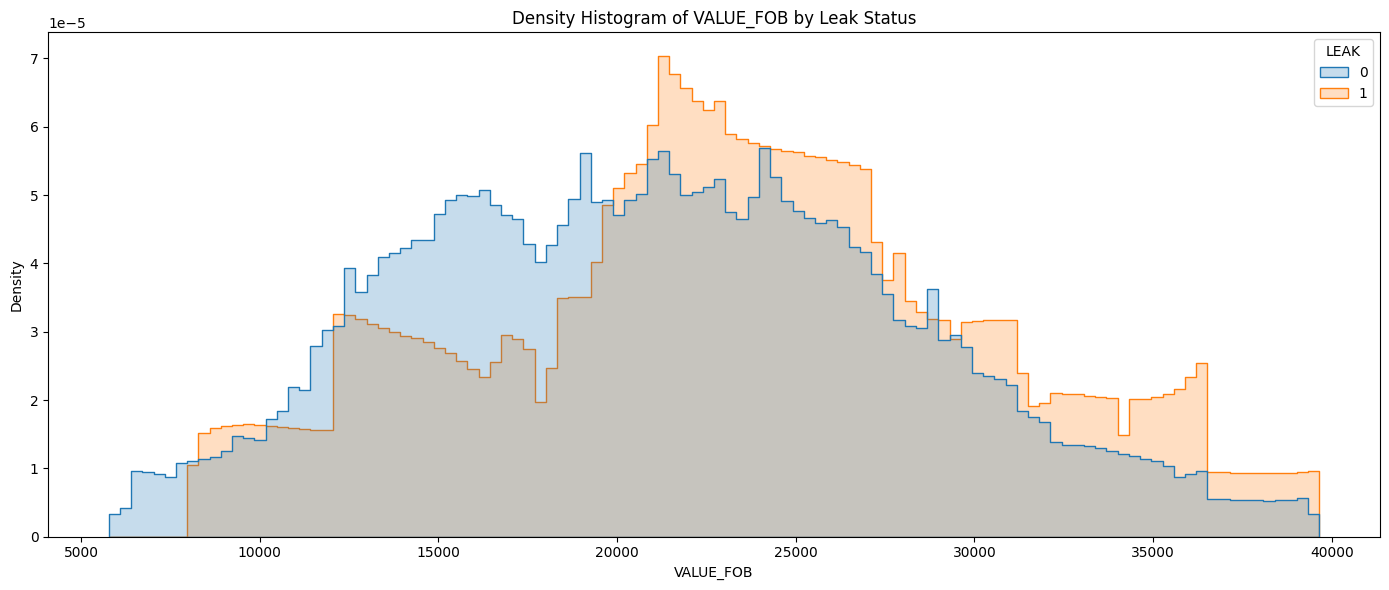

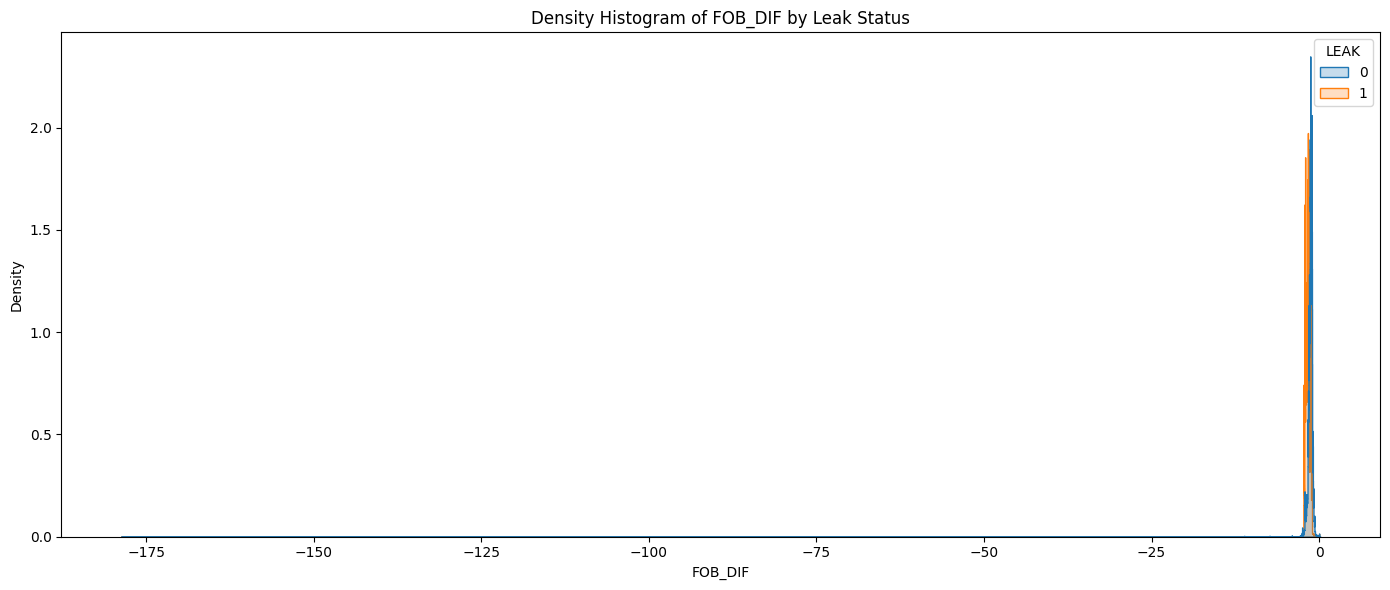

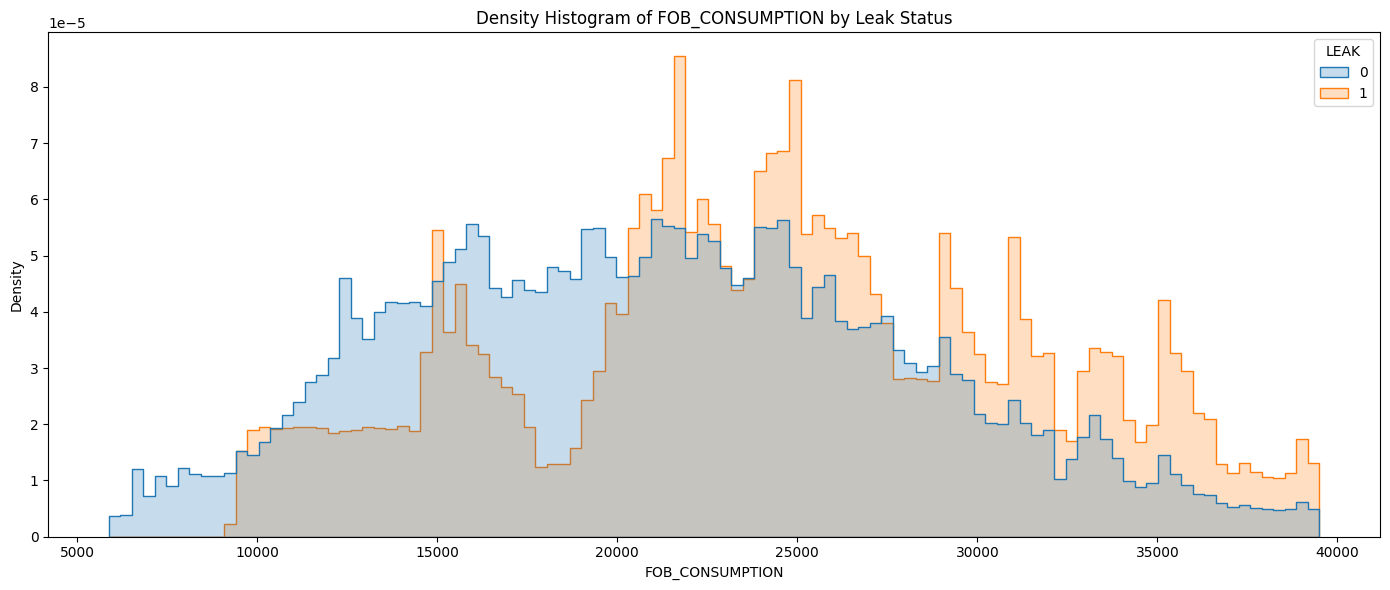

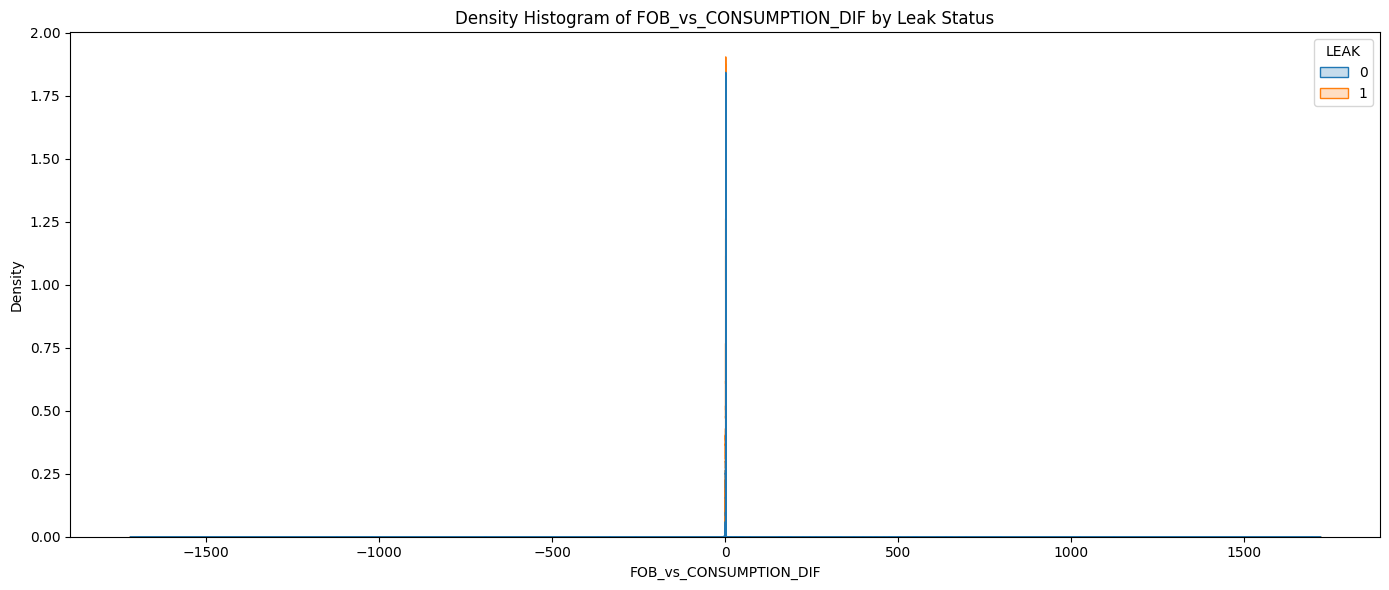

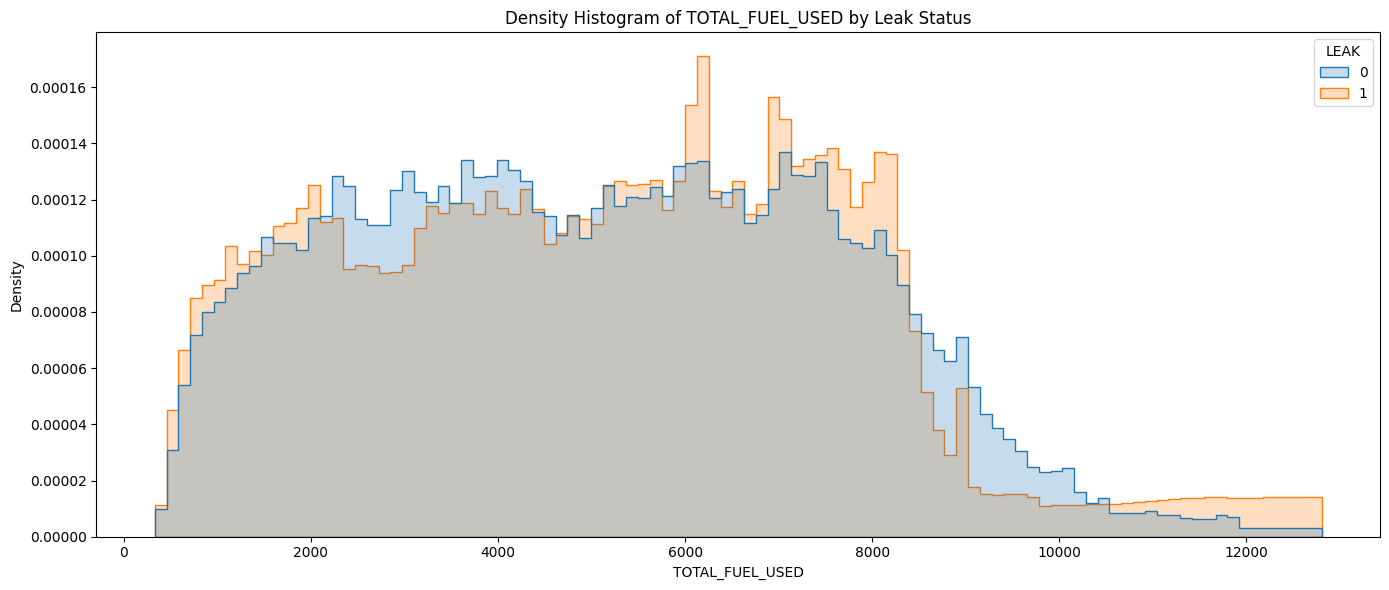

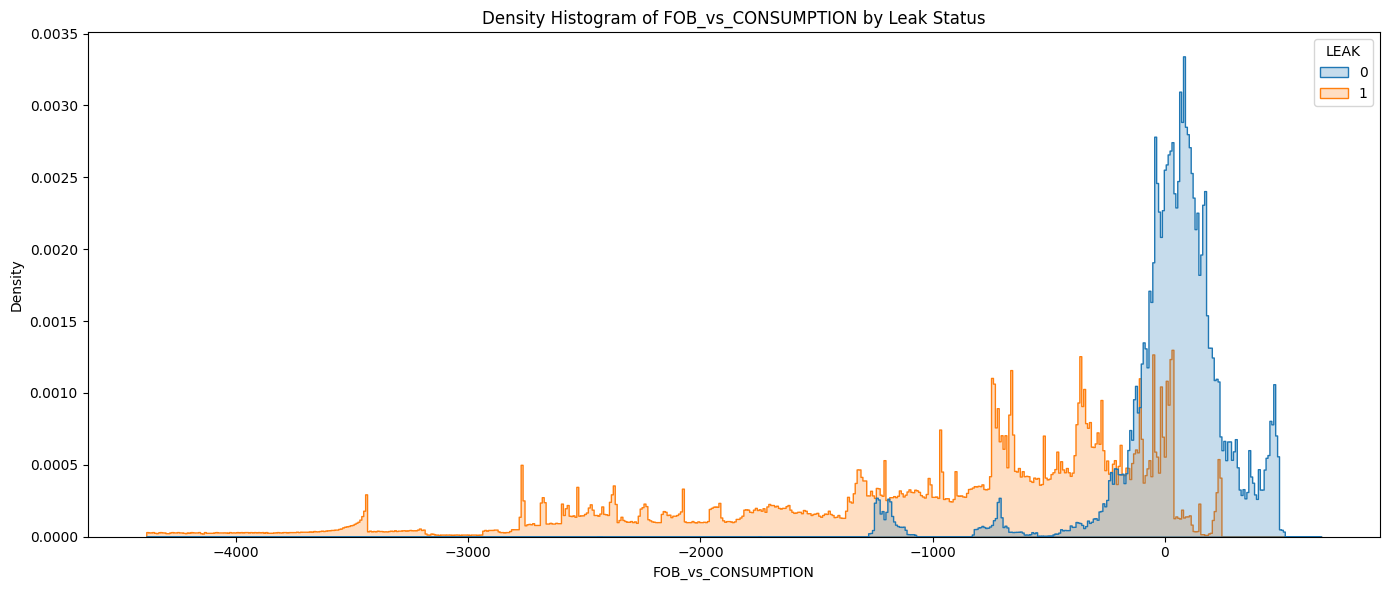

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_analyse = ['VALUE_FOB', 'FOB_DIF', 'FOB_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'TOTAL_FUEL_USED', 'FOB_vs_CONSUMPTION']

# Iterate over the columns in df_final
for column in columns_analyse:
    # Create a figure for the subplot
    fig, axs = plt.subplots(figsize=(14, 6))

    # Histogram for the column
    sns.histplot(data=df_final, x=column, hue="LEAK", element="step", stat="density", common_norm=False, ax=axs)
    axs.set_title(f'Density Histogram of {column} by Leak Status')

    plt.tight_layout()
    plt.show()


In [10]:
df_final[['FOB_DIF','FOB_vs_CONSUMPTION_DIF']].describe()

,FOB_DIF,FOB_vs_CONSUMPTION_DIF
count,269997.000000,269997.000000
mean,-1.440609,-0.062831
std,0.698229,10.066898
min,-178.721929,-1721.869364
25%,-1.587075,-0.278971
50%,-1.357376,-0.041292
75%,-1.184380,0.138337
max,0.139828,1719.920667


In [11]:
from scipy import stats

# Calculate z-scores for FOB_DIF and FOB_vs_CONSUMPTION_DIF columns
z_scores_fob_dif = stats.zscore(df_final['FOB_DIF'])
z_scores_fob_vs_consumption_dif = stats.zscore(df_final['FOB_vs_CONSUMPTION_DIF'])

# Define a threshold for outlier detection
threshold = 3

# Filter out rows with z-scores above the threshold
df_final_no_outliars = df_final[(np.abs(z_scores_fob_dif) < threshold) & (np.abs(z_scores_fob_vs_consumption_dif) < threshold)]


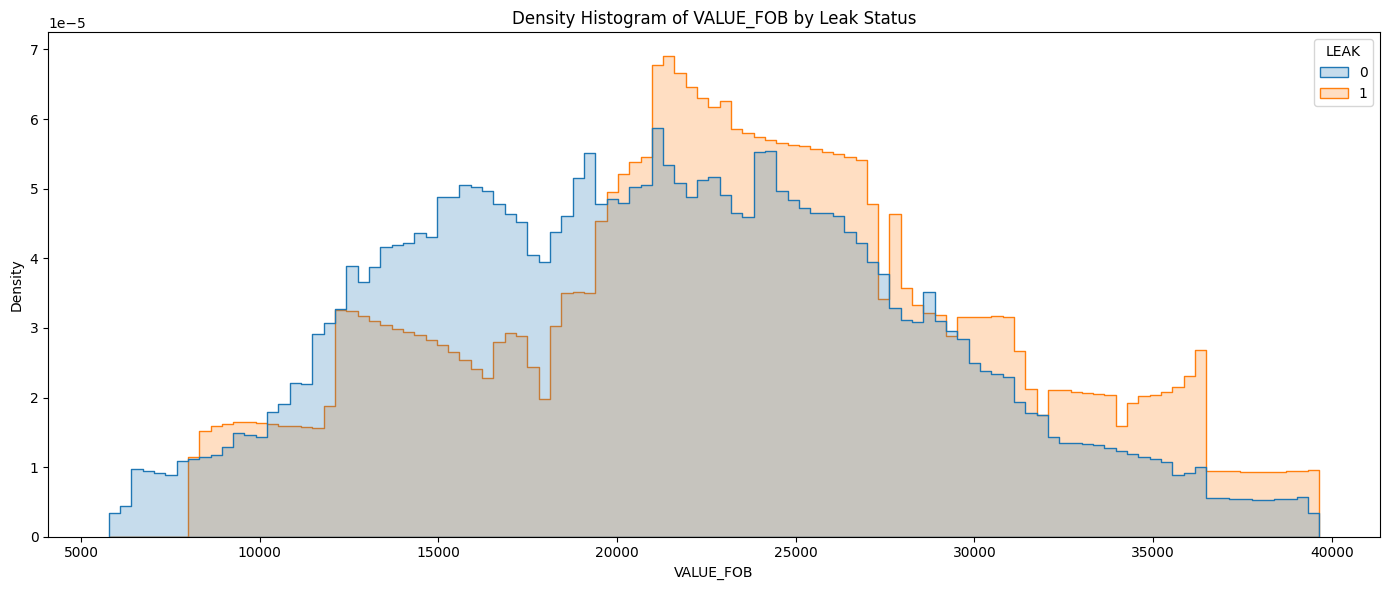

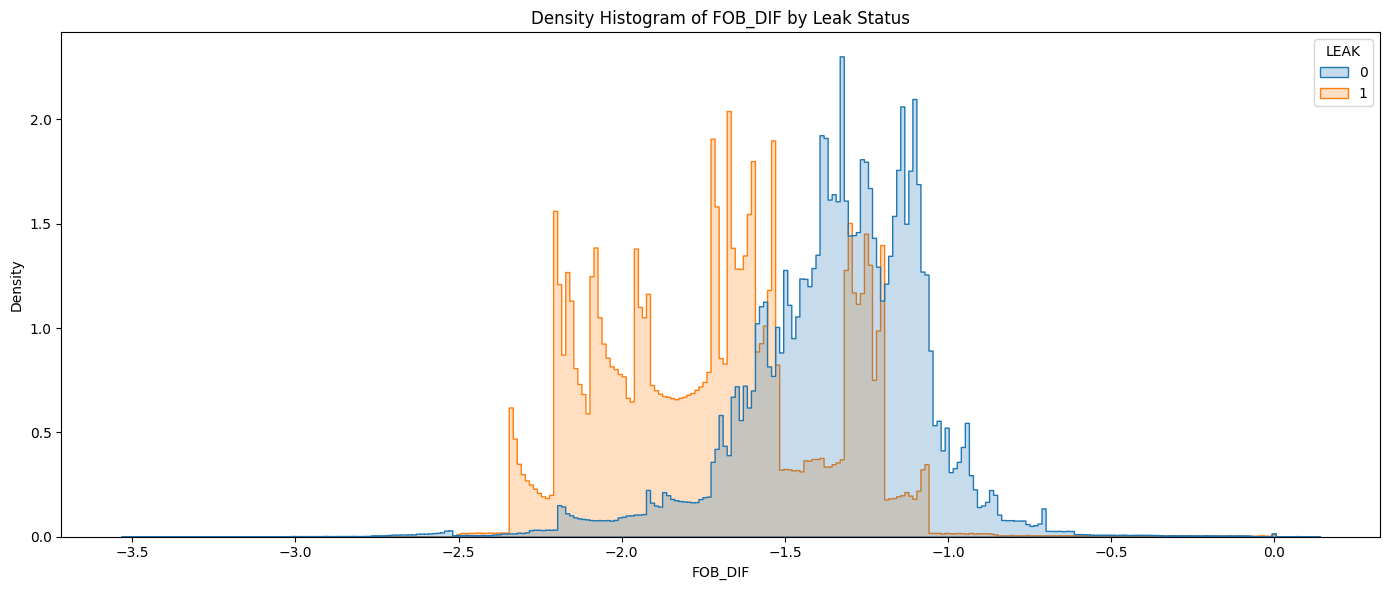

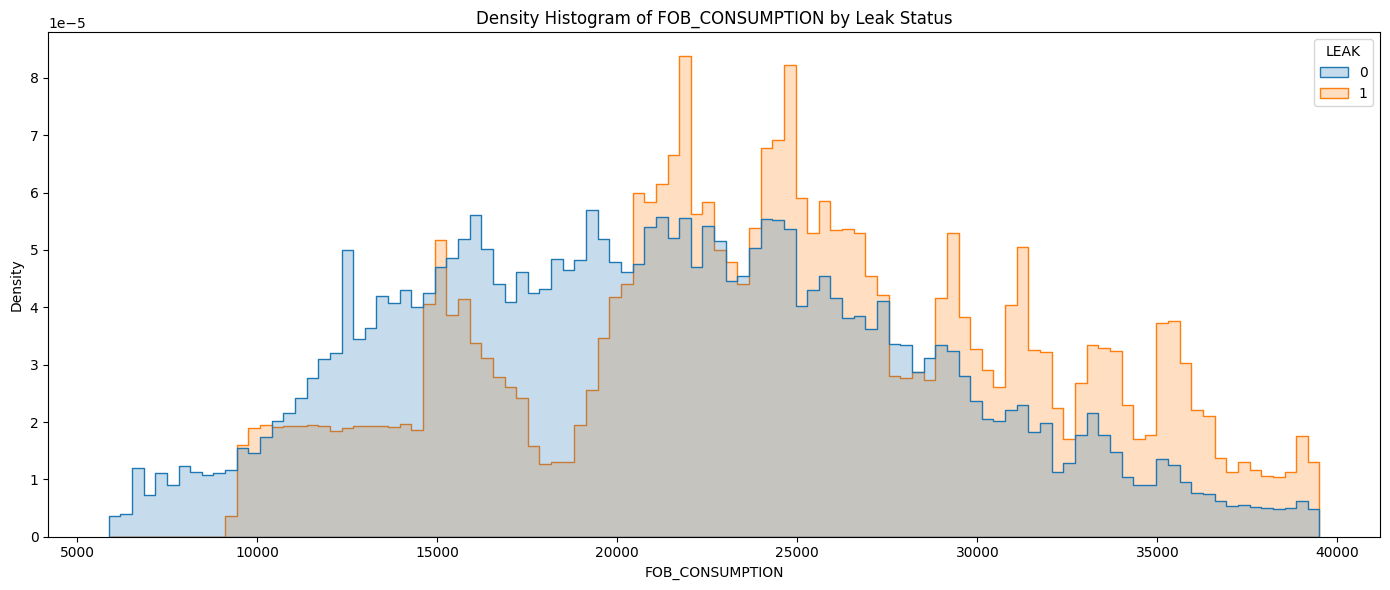

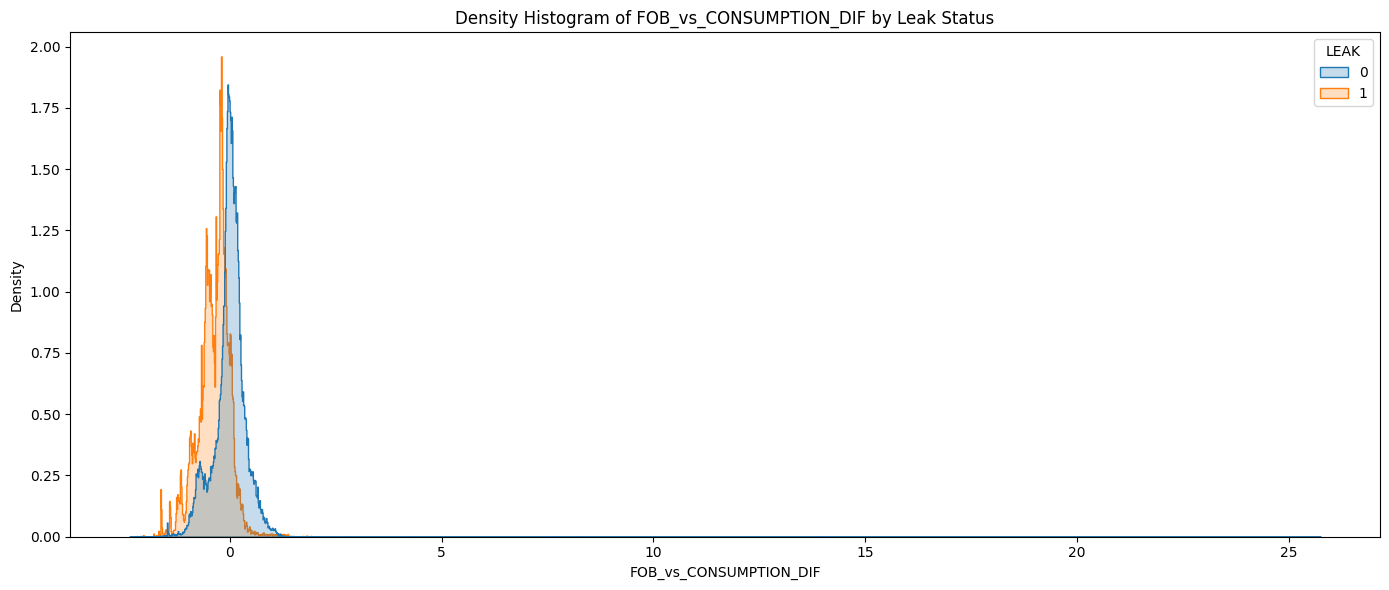

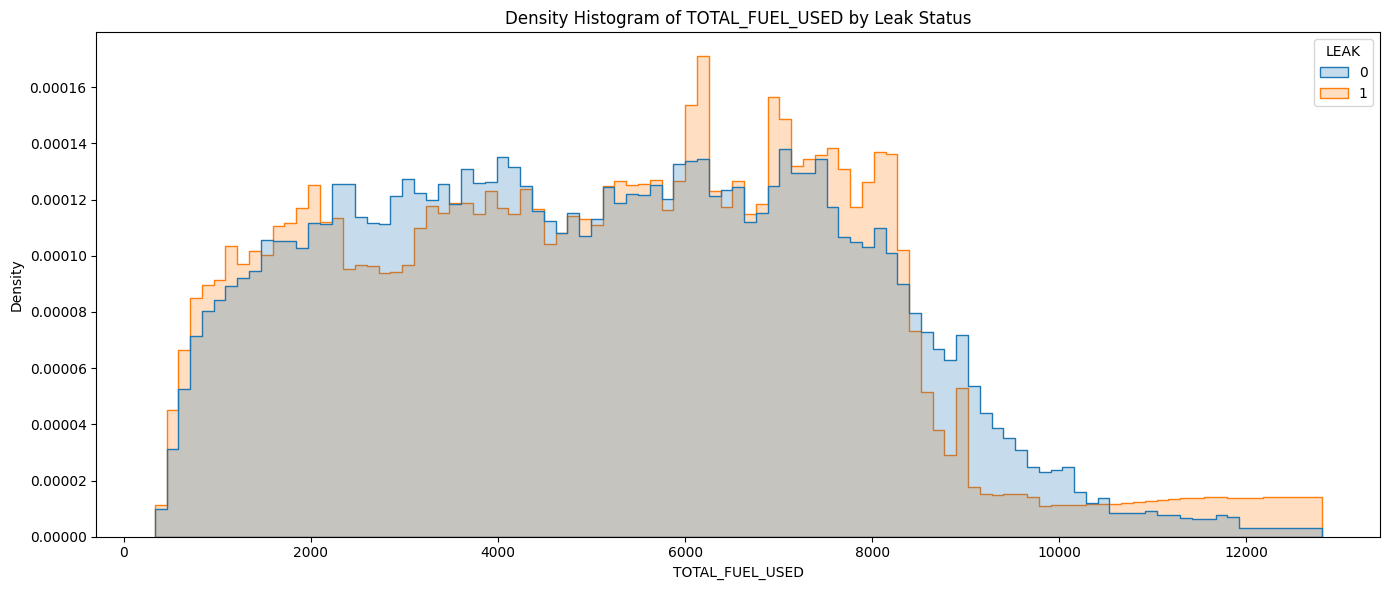

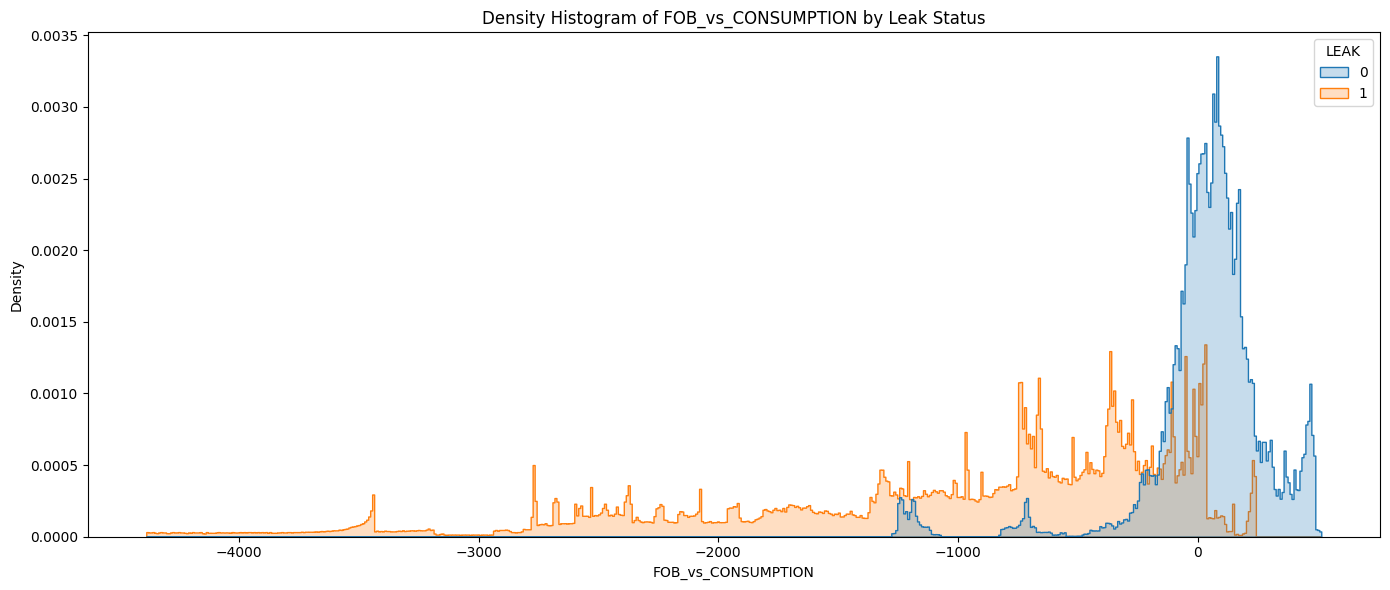

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_analyse = ['VALUE_FOB', 'FOB_DIF', 'FOB_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'TOTAL_FUEL_USED', 'FOB_vs_CONSUMPTION']

# Iterate over the columns in df_final
for column in columns_analyse:
    # Create a figure for the subplot
    fig, axs = plt.subplots(figsize=(14, 6))

    # Histogram for the column
    sns.histplot(data=df_final_no_outliars, x=column, hue="LEAK", element="step", stat="density", common_norm=False, ax=axs)
    axs.set_title(f'Density Histogram of {column} by Leak Status')

    plt.tight_layout()
    plt.show()

In [13]:
df_final_no_outliars[['FOB_DIF','FOB_vs_CONSUMPTION_DIF']].describe()

,FOB_DIF,FOB_vs_CONSUMPTION_DIF
count,268535.000000,268535.000000
mean,-1.411738,-0.085329
std,0.330714,0.399745
min,-3.533691,-2.368313
25%,-1.583076,-0.272443
50%,-1.355438,-0.039675
75%,-1.183178,0.139470
max,0.139828,25.746518


In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Calculate Q1 and Q3
Q1 = df_final['FOB_vs_CONSUMPTION_DIF'].quantile(0.25)
Q3 = df_final['FOB_vs_CONSUMPTION_DIF'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_filtered = df_final[(df_final['FOB_vs_CONSUMPTION_DIF'] >= lower_bound) & (df_final['FOB_vs_CONSUMPTION_DIF'] <= upper_bound)]

# You can now proceed with the data_filtered DataFrame for further analysis.

In [15]:
data_filtered[['FOB_DIF','FOB_vs_CONSUMPTION_DIF']].describe()


,FOB_DIF,FOB_vs_CONSUMPTION_DIF
count,256168.000000,256168.000000
mean,-1.403337,-0.068322
std,0.310343,0.329992
min,-2.766846,-0.904902
25%,-1.575904,-0.243250
50%,-1.352798,-0.034881
75%,-1.183230,0.135876
max,0.081526,0.764168


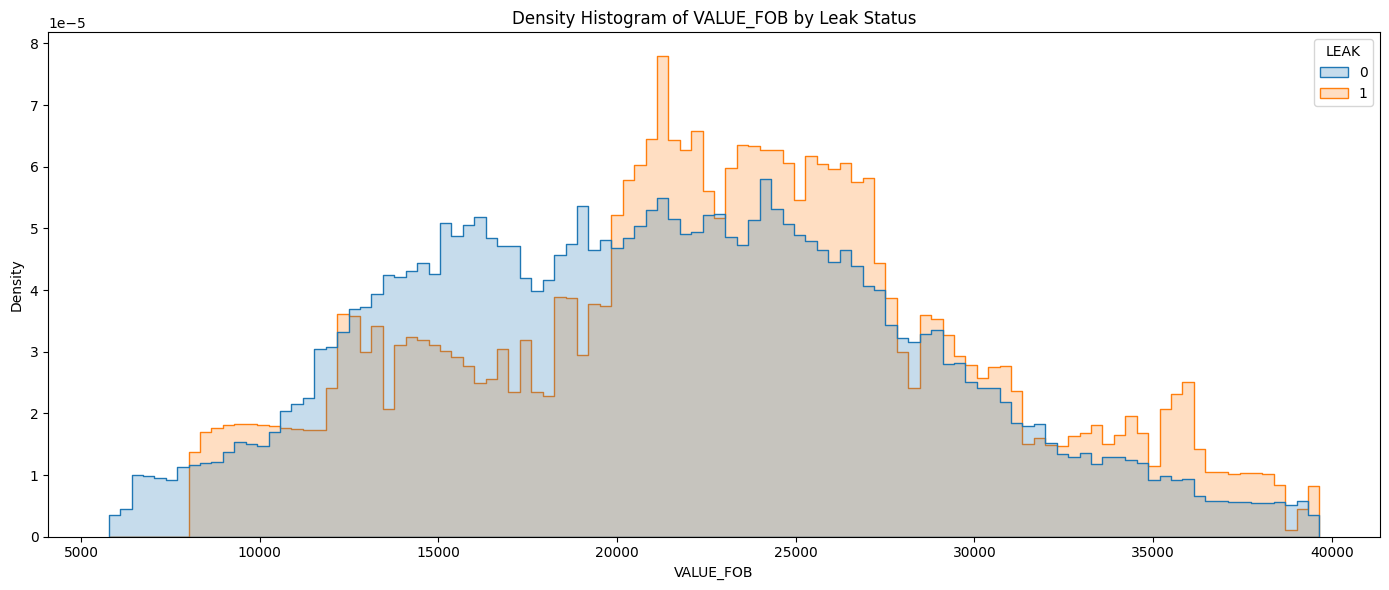

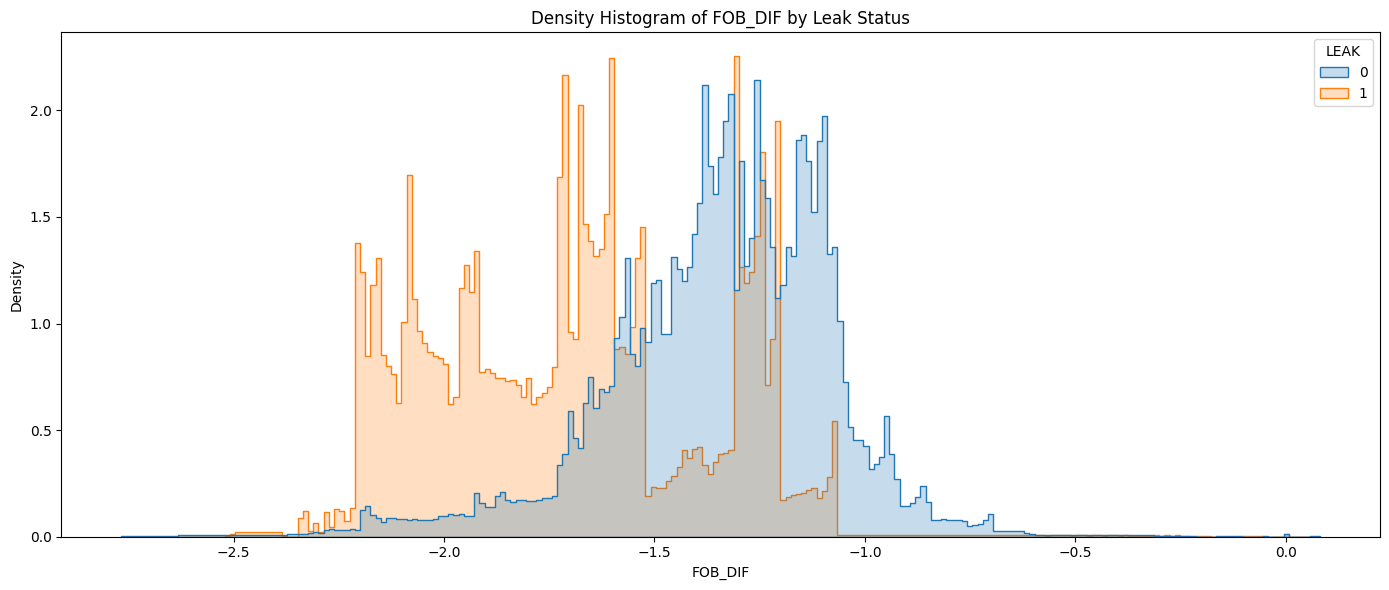

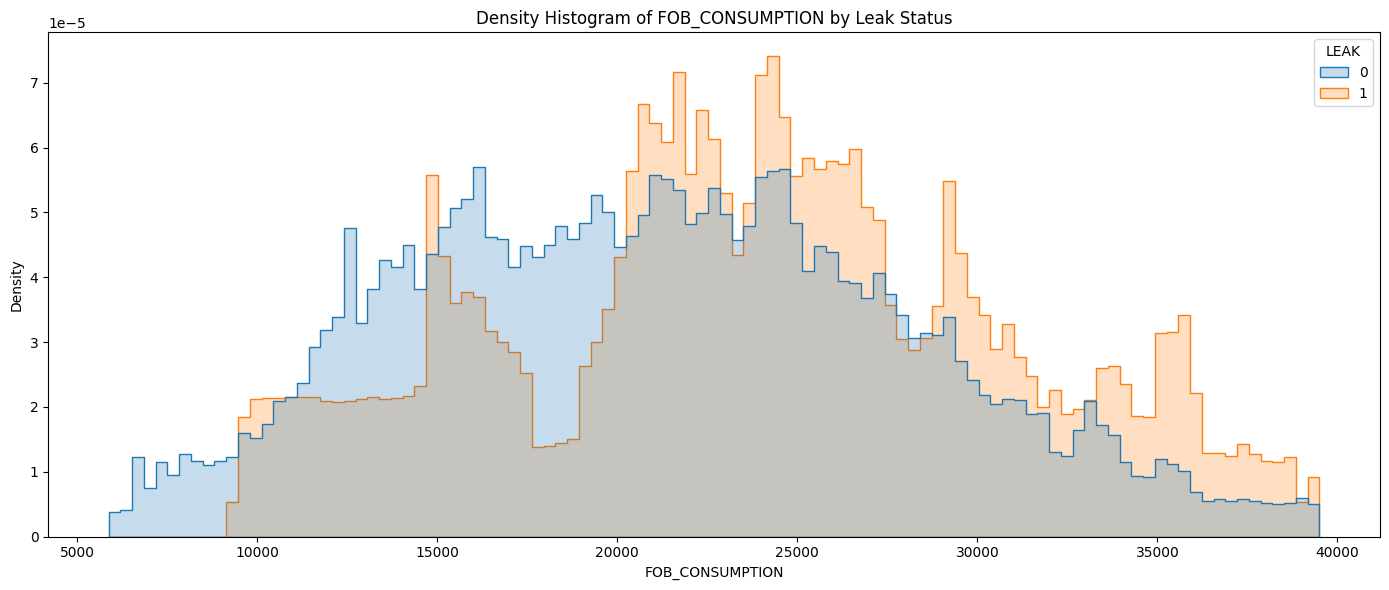

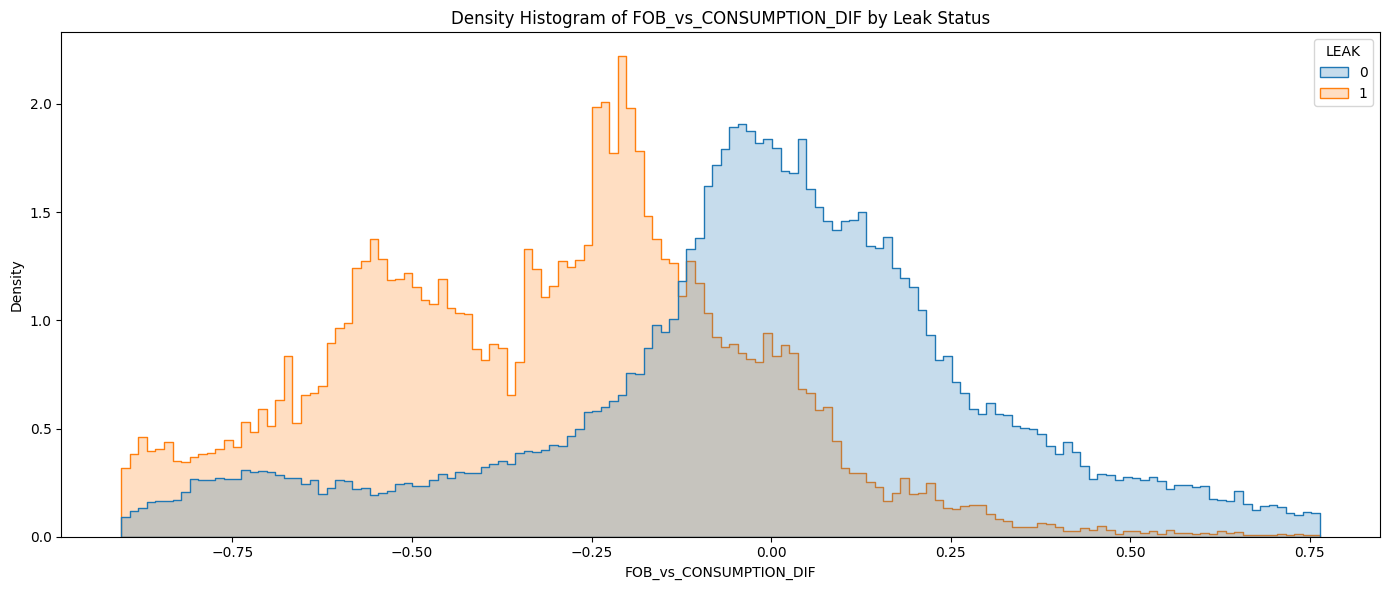

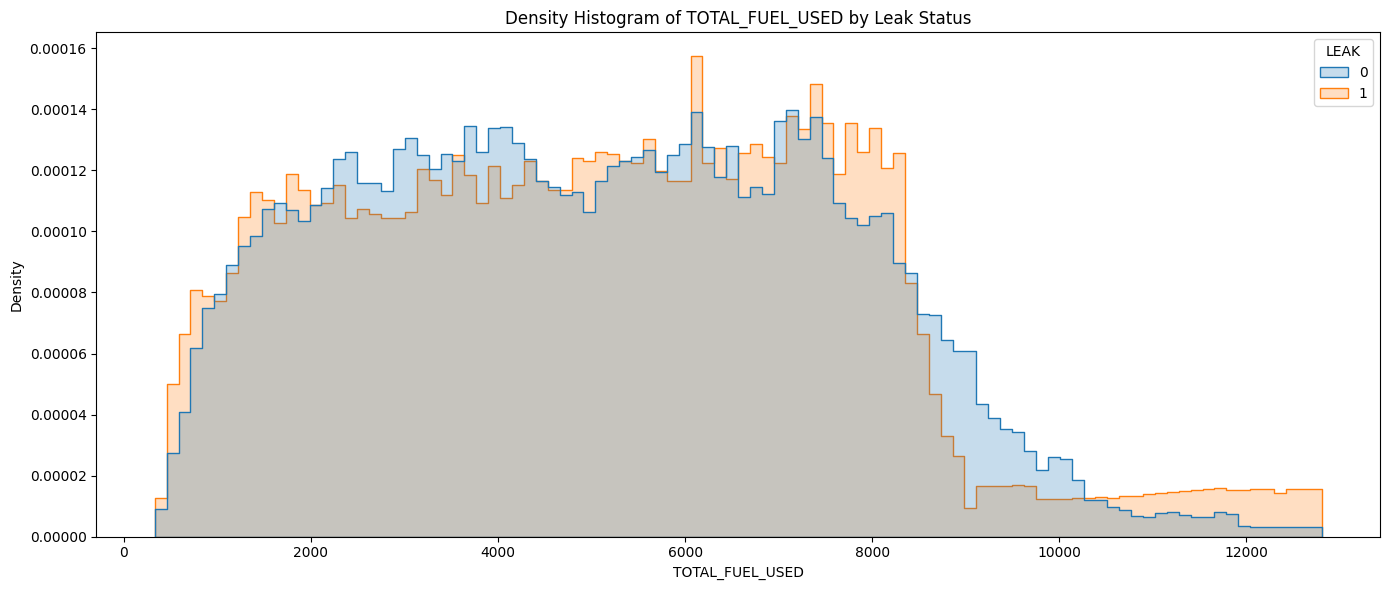

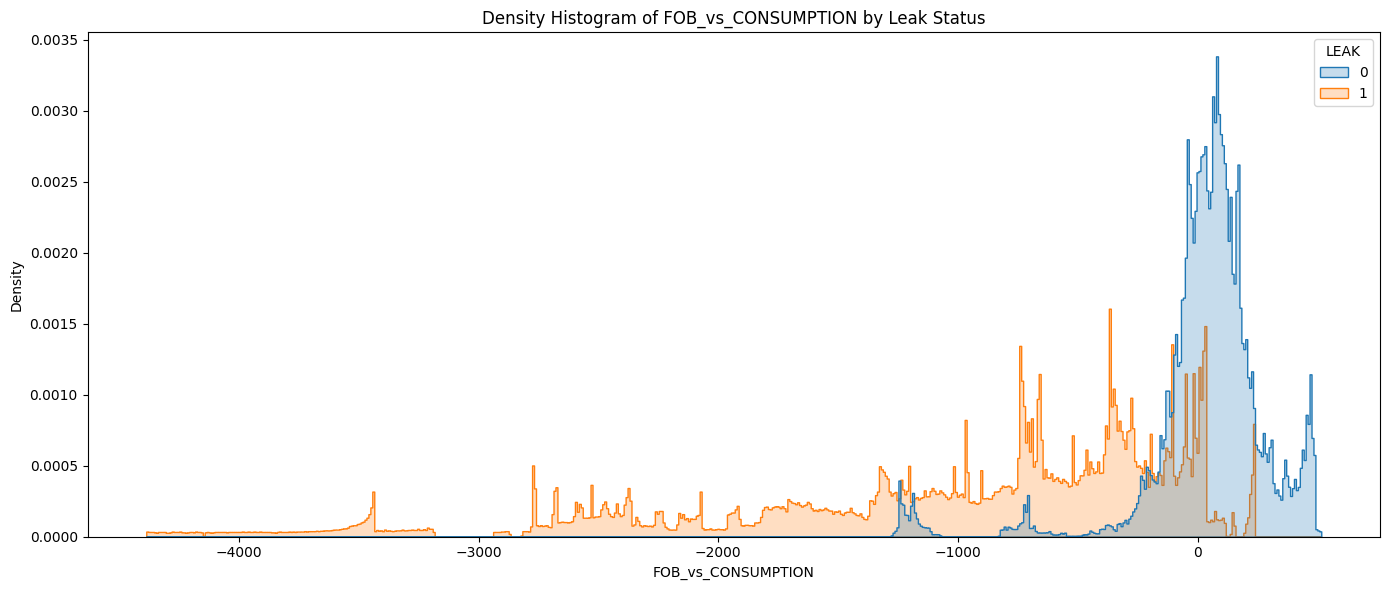

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_analyse = ['VALUE_FOB', 'FOB_DIF', 'FOB_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'TOTAL_FUEL_USED', 'FOB_vs_CONSUMPTION']

# Iterate over the columns in df_final
for column in columns_analyse:
    # Create a figure for the subplot
    fig, axs = plt.subplots(figsize=(14, 6))

    # Histogram for the column
    sns.histplot(data=data_filtered, x=column, hue="LEAK", element="step", stat="density", common_norm=False, ax=axs)
    axs.set_title(f'Density Histogram of {column} by Leak Status')

    plt.tight_layout()
    plt.show()

## Model Part 1

### Machine Learning Models

In [17]:
data_filtered['LEAK'].value_counts()/len(data_filtered)

LEAK
0    0.827882
1    0.172118
Name: count, dtype: float64

#### Split the data 

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit

In [19]:
data_filtered.columns

Index(['Unnamed: 0', 'UTC_TIME', 'Flight', 'FW_GEO_ALTITUDE',
       'TOTAL_FUEL_USED', 'FUSED_dif', 'SECONDS_PER_FLIGHT',
       'TOTAL_SECONDS_PER_FLIGHT', 'FOB_CONSUMPTION', 'VALUE_FOB', 'FOB_DIF',
       'FOB_vs_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'LEAK', 'Unnamed: 0.1'],
      dtype='object')

In [20]:
# Correct the features and target setup
data = data_filtered

# i need to drop more columns for X
X = data.drop(['LEAK','Unnamed: 0','TOTAL_SECONDS_PER_FLIGHT','FOB_DIF','Unnamed: 0.1','UTC_TIME','TOTAL_FUEL_USED', 'FUSED_dif', 'FOB_CONSUMPTION','FOB_vs_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF'], axis=1)
y = data['LEAK'] 

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [21]:
X.columns

Index(['Flight', 'FW_GEO_ALTITUDE', 'SECONDS_PER_FLIGHT', 'VALUE_FOB'], dtype='object')

In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Convert the scaled data back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [23]:
# Define the model with chosen hyperparameters
model_LR = LogisticRegression(C=1, random_state=42, class_weight='balanced')

# Fit the model to the training data
model_LR.fit(X_train_scaled, y_train)

# Predictions on the training and test sets
y_train_pred = model_LR.predict(X_train_scaled)
y_test_pred = model_LR.predict(X_test_scaled)

# Evaluation on the training set
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

# Evaluation on the test set
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

Training Set Evaluation:
Accuracy: 0.5499185103496735
Recall: 0.5774495881851747
Precision: 0.2081256205791731
F1 Score: 0.3059721145815306

Test Set Evaluation:
Accuracy: 0.546902447593395
Recall: 0.5779754532147281
Precision: 0.20866701898451157
F1 Score: 0.30663082437275985


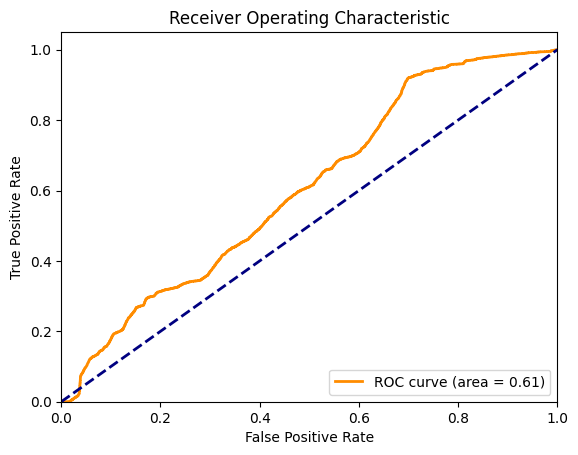

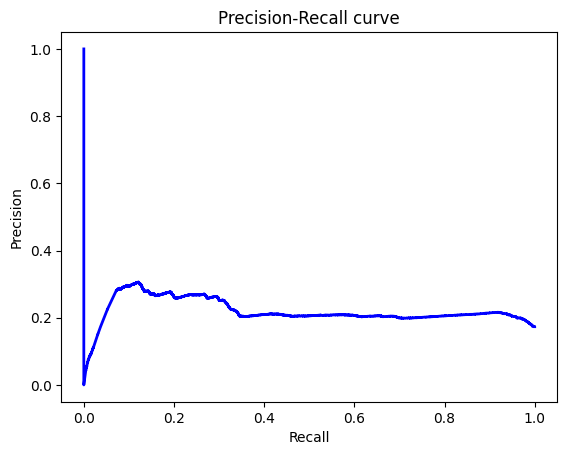

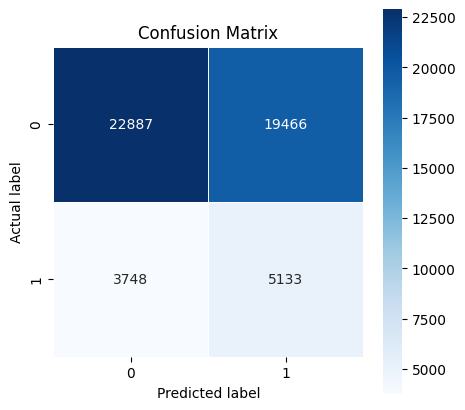

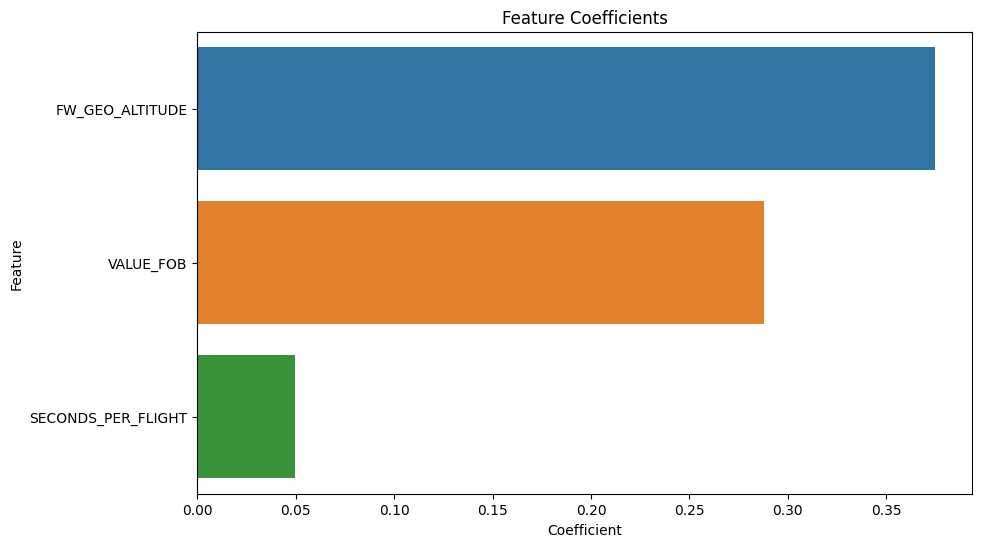

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Coefficient Plot
coefficients = model_LR.coef_.flatten()
features = X_train_scaled.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients')
plt.show()


### xgboost


In [25]:
''''
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define the pipeline with a single step containing the XGBoost model
pipe = Pipeline(steps=[('model', XGBClassifier(random_state=0))])

# Define the parameter grid to search over
param_grid_XGB = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [10, 15],
    "model__subsample": [0.75, 1.0],
    "model__min_child_weight": [3, 5],  # Additional parameter to control over-fitting
    "model__gamma": [0, 0.2]
}

# Define grid search
grid_search_XGB = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_XGB,
    scoring='f1',
)

# Fit grid search to the training data
grid_search_XGB.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_parameters_XGB = grid_search_XGB.best_params_
best_score_XGB = grid_search_XGB.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters_XGB)
print("Best Score:", best_score_XGB)

# Predict on the training data using the best found parameters
y_train_pred_XGB = grid_search_XGB.best_estimator_.predict(X_train_scaled)

# Calculate and print the metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred_XGB)
train_recall = recall_score(y_train, y_train_pred_XGB, average='binary')
train_f1 = f1_score(y_train, y_train_pred_XGB, average='binary')
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Training Set Recall: {train_recall}")
print(f"Training Set F1 Score: {train_f1}")

# Predict on the test data using the best found parameters
y_test_pred_XGB = grid_search_XGB.best_estimator_.predict(X_test_scaled)

# Calculate and print the metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred_XGB)
test_recall = recall_score(y_test, y_test_pred_XGB, average='binary')
test_f1 = f1_score(y_test, y_test_pred_XGB, average='binary')
print(f"Test Set Accuracy: {test_accuracy}")
print(f"Test Set Recall: {test_recall}")
print(f"Test Set F1 Score: {test_f1}")'''

'\'\nfrom sklearn.pipeline import Pipeline\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, recall_score, f1_score\n\n# Define the pipeline with a single step containing the XGBoost model\npipe = Pipeline(steps=[(\'model\', XGBClassifier(random_state=0))])\n\n# Define the parameter grid to search over\nparam_grid_XGB = {\n    "model__n_estimators": [50, 100],\n    "model__max_depth": [10, 15],\n    "model__subsample": [0.75, 1.0],\n    "model__min_child_weight": [3, 5],  # Additional parameter to control over-fitting\n    "model__gamma": [0, 0.2]\n}\n\n# Define grid search\ngrid_search_XGB = GridSearchCV(\n    estimator=pipe,\n    param_grid=param_grid_XGB,\n    scoring=\'f1\',\n)\n\n# Fit grid search to the training data\ngrid_search_XGB.fit(X_train_scaled, y_train)\n\n# Get the best parameters and score\nbest_parameters_XGB = grid_search_XGB.best_params_\nbest_score_XGB = grid_search_XGB.best_score_\n\n#

In [26]:
'''import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = grid_search_XGB.best_estimator_.named_steps['model'].feature_importances_

# Create a series with feature importances and sort it
importances = pd.Series(feature_importances, index=X_train_scaled.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()'''


"import matplotlib.pyplot as plt\n\n# Get feature importances from the model\nfeature_importances = grid_search_XGB.best_estimator_.named_steps['model'].feature_importances_\n\n# Create a series with feature importances and sort it\nimportances = pd.Series(feature_importances, index=X_train_scaled.columns).sort_values(ascending=False)\n\n# Plot the feature importances\nplt.figure(figsize=(10, 6))\nimportances.plot(kind='bar')\nplt.title('Feature Importance')\nplt.ylabel('Importance')\nplt.xlabel('Features')\nplt.show()"

In [27]:
'''# Define metrics and their values
metrics = ['Accuracy', 'Recall', 'F1 Score']
train_scores = [train_accuracy, train_recall, train_f1]
test_scores = [test_accuracy, test_recall, test_f1]

# Set up the bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Metric and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()
'''

"# Define metrics and their values\nmetrics = ['Accuracy', 'Recall', 'F1 Score']\ntrain_scores = [train_accuracy, train_recall, train_f1]\ntest_scores = [test_accuracy, test_recall, test_f1]\n\n# Set up the bar chart\nx = np.arange(len(metrics))  # the label locations\nwidth = 0.35  # the width of the bars\n\nfig, ax = plt.subplots()\nrects1 = ax.bar(x - width/2, train_scores, width, label='Train')\nrects2 = ax.bar(x + width/2, test_scores, width, label='Test')\n\n# Add some text for labels, title, and custom x-axis tick labels, etc.\nax.set_ylabel('Scores')\nax.set_title('Scores by Metric and Dataset')\nax.set_xticks(x)\nax.set_xticklabels(metrics)\nax.legend()\n\nfig.tight_layout()\nplt.show()\n"

In [28]:
'''import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the grid search results to a DataFrame
results_df = pd.DataFrame(grid_search_XGB.cv_results_)

# Filter the results for a specific parameter (e.g., 'model__n_estimators')
estimators_results = results_df.loc[results_df['param_model__n_estimators'].isin([50, 100])]

# Calculate the mean test score for each 'n_estimators' value
mean_scores = estimators_results.groupby('param_model__n_estimators').mean_test_score.mean()

# Plotting the mean F1 score for each 'n_estimators' value
plt.figure(figsize=(8, 6))
plt.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-', color='b')
plt.title('Mean F1 Score for Different Numbers of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.grid(True)
plt.show()'''


"import matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Convert the grid search results to a DataFrame\nresults_df = pd.DataFrame(grid_search_XGB.cv_results_)\n\n# Filter the results for a specific parameter (e.g., 'model__n_estimators')\nestimators_results = results_df.loc[results_df['param_model__n_estimators'].isin([50, 100])]\n\n# Calculate the mean test score for each 'n_estimators' value\nmean_scores = estimators_results.groupby('param_model__n_estimators').mean_test_score.mean()\n\n# Plotting the mean F1 score for each 'n_estimators' value\nplt.figure(figsize=(8, 6))\nplt.plot(mean_scores.index, mean_scores.values, marker='o', linestyle='-', color='b')\nplt.title('Mean F1 Score for Different Numbers of Estimators')\nplt.xlabel('Number of Estimators')\nplt.ylabel('Mean F1 Score')\nplt.grid(True)\nplt.show()"

### LGBM

In [29]:
# Correct the features and target setup
data_LGBM = data_filtered

# i need to drop more columns for X
X_LGBM = data.drop(['LEAK','Unnamed: 0','FOB_DIF','Unnamed: 0.1','UTC_TIME','TOTAL_FUEL_USED', 'FUSED_dif', 'FOB_CONSUMPTION','FOB_vs_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF'], axis=1)
y_LGBM = data['LEAK'] 

numerical_features =X_LGBM.select_dtypes(include=['int64', 'float64']).columns

In [30]:
# Split the data into training and test sets
X_train_LGBM, X_test_LGBM, y_train_LGBM, y_test_LGBM = train_test_split(X_LGBM, y_LGBM, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_LGBM = scaler.fit_transform(X_train_LGBM[numerical_features])
X_test_scaled_LGBM = scaler.transform(X_test_LGBM[numerical_features])

# Convert the scaled data back to a DataFrame
X_train_scaled_LGBM = pd.DataFrame(X_train_scaled_LGBM, columns=numerical_features, index=X_train.index)
X_test_scaled_LGBM = pd.DataFrame(X_test_scaled_LGBM, columns=numerical_features, index=X_test.index)

In [31]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define the pipeline with a single step containing the LightGBM model
# Note: LightGBM handles feature scaling internally, so we don't need a scaler here
pipe = Pipeline(steps=[('model', LGBMClassifier(random_state=0))])

# Define the parameter grid to search over
# Adjust these parameters as necessary for your dataset and goals
param_grid_LGBM = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [5],
    "model__learning_rate": [0.01, 0.1],
    "model__num_leaves": [10],
    "model__min_child_samples": [20, 40],
}


# Define grid search
grid_search_LGBM = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_LGBM,
    scoring='f1',
)

# Fit grid search to the training data
grid_search_LGBM.fit(X_train_scaled_LGBM, y_train_LGBM)

# Get the best parameters and score
best_parameters_LGBM = grid_search_LGBM.best_params_
best_score_LGBM = grid_search_LGBM.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters_LGBM)
print("Best Score:", best_score_LGBM)

# Predict on the training data using the best found parameters
y_train_pred_LGBM = grid_search_LGBM.best_estimator_.predict(X_train_scaled_LGBM)

# Calculate and print the metrics for the training set
train_accuracy_LGBM = accuracy_score(y_train_LGBM, y_train_pred_LGBM)
train_recall_LGBM = recall_score(y_train_LGBM, y_train_pred_LGBM, average='binary')
train_f1_LGBM = f1_score(y_train_LGBM, y_train_pred_LGBM, average='binary')
print(f"Training Set Accuracy: {train_accuracy_LGBM}")
print(f"Training Set Recall: {train_recall_LGBM}")
print(f"Training Set F1 Score: {train_f1_LGBM}")

# Predict on the test data using the best found parameters
y_test_pred_LGBM = grid_search_LGBM.best_estimator_.predict(X_test_scaled_LGBM)

# Calculate and print the metrics for the test set
test_accuracy_LGBM = accuracy_score(y_test_LGBM, y_test_pred_LGBM)
test_recall_LGBM = recall_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
test_f1_LGBM = f1_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
test_presicion_LGBM = precision_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
print(f"Test Set Accuracy: {test_accuracy_LGBM}")
print(f"Test Set Recall: {test_recall_LGBM}")
print(f"Test Set Presicion: {test_presicion_LGBM}")
print(f"Test Set F1 Score: {test_f1_LGBM}")

c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Number of positive: 28168, number of negative: 135779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 163947, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171812 -> initscore=-1.572842
[LightGBM] [Info] Start training from score -1.572842
[LightGBM] [Info] Number of positive: 28168, number of negative: 135779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 163947, number of used features: 4
[LightGBM] [Info] 

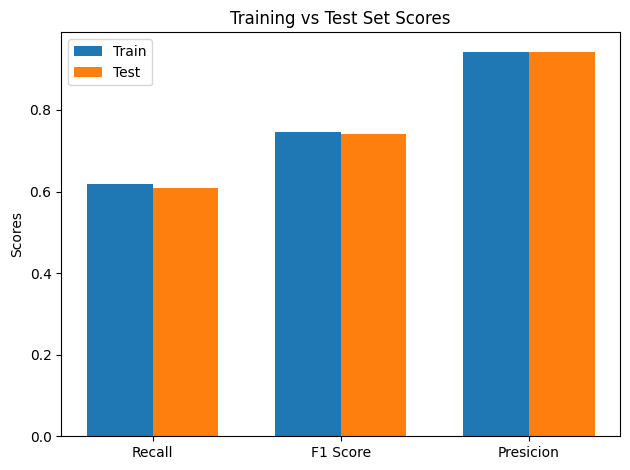

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['Recall', 'F1 Score', 'Presicion']
train_scores = [train_recall_LGBM, train_f1_LGBM, test_presicion_LGBM]
test_scores = [test_recall_LGBM, test_f1_LGBM,  test_presicion_LGBM]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Set Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()


In [33]:
# Get the predicted probabilities for the positive class
y_probs = grid_search_LGBM.best_estimator_.predict_proba(X_test_scaled_LGBM)[:, 1]


In [34]:
from sklearn.metrics import recall_score, accuracy_score

thresholds = np.linspace(0, 1, 100)
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    # Apply threshold to positive class probabilities to create binary predictions
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate recall and accuracy
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)


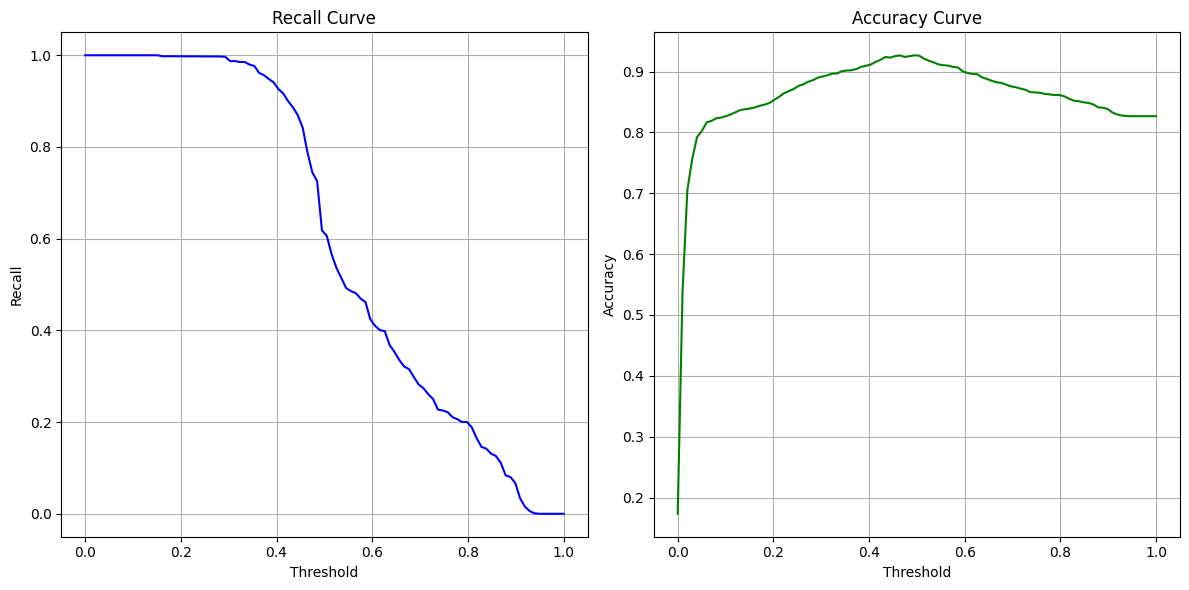

In [35]:
plt.figure(figsize=(12, 6))

# Recall curve
plt.subplot(1, 2, 1)
plt.plot(thresholds, recall_scores, label='Recall', color='blue')
plt.title('Recall Curve')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.grid(True)

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(thresholds, accuracy_scores, label='Accuracy', color='green')
plt.title('Accuracy Curve')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


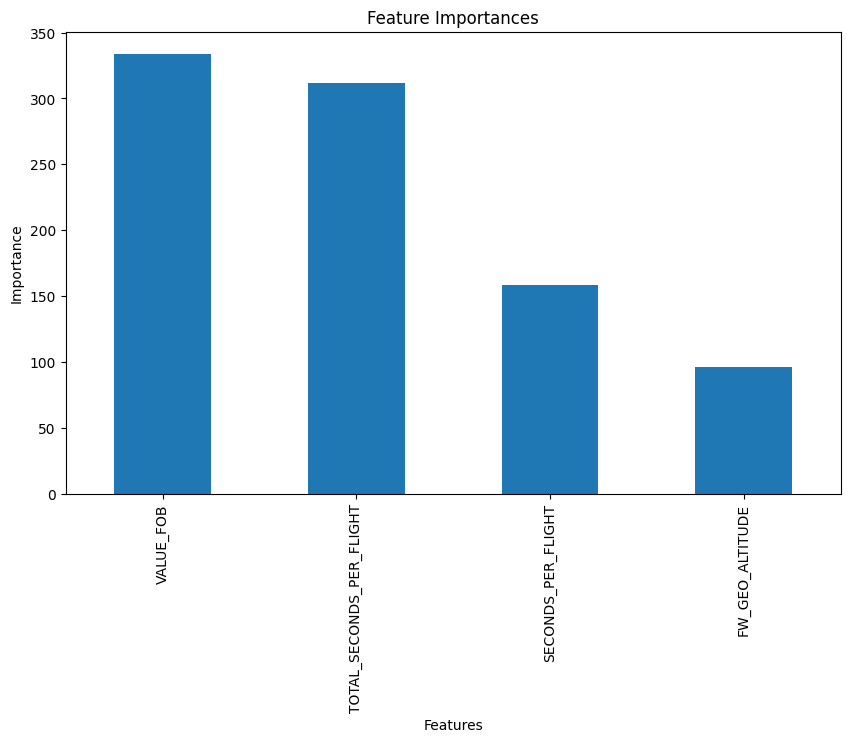

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the best LightGBM model from the grid search
best_lgbm_model = grid_search_LGBM.best_estimator_.named_steps['model']

# Get feature importances
feature_importances = best_lgbm_model.feature_importances_

# Create a pandas series to easily sort the feature importances
importance_series = pd.Series(feature_importances, index=numerical_features)

# Sort the features by their importance
sorted_importances = importance_series.sort_values(ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Test    

In [37]:
df_fina_test_37 = pd.read_csv('msn37_fortest.csv')

In [38]:
df_fina_test_37

,Unnamed: 0,UTC_TIME,FW_GEO_ALTITUDE,Flight,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,FUSED_dif,FOB_CONSUMPTION,FOB,FOB_DIF,FOB_vs_CONSUMPTION,FOB_vs_CONSUMPTION_DIF
0,441,2016-08-23 12:30:37,29977.0,11.0,2685.797119,1573.0,10387.0,0.000000,17070.000000,17069.207858,NaN,-0.792142,NaN
1,442,2016-08-23 12:30:38,29983.0,11.0,2687.107483,1574.0,10387.0,1.310364,17068.689636,17068.225707,-0.982150,-0.463929,0.328213
2,443,2016-08-23 12:30:39,29977.0,11.0,2688.342224,1575.0,10387.0,1.234741,17067.454895,17067.236401,-0.989306,-0.218494,0.245435
3,444,2016-08-23 12:30:40,29976.0,11.0,2689.734802,1576.0,10387.0,1.392578,17066.062317,17066.241182,-0.995219,0.178865,0.397359
4,445,2016-08-23 12:30:41,29985.0,11.0,2690.970642,1577.0,10387.0,1.235840,17064.826477,17065.241215,-0.999967,0.414738,0.235873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55740,91539,2018-03-31 08:54:16,3082.0,494.0,4988.280762,3470.0,6373.0,0.875977,12703.960327,12620.272156,-0.087298,-83.688172,0.788678
55741,91540,2018-03-31 08:54:17,3084.0,494.0,4989.239624,3471.0,6373.0,0.958862,12703.001465,12620.195560,-0.076595,-82.805905,0.882267
55742,91541,2018-03-31 08:54:18,3085.0,494.0,4990.272095,3472.0,6373.0,1.032471,12701.968994,12620.129627,-0.065933,-81.839367,0.966537
55743,91542,2018-03-31 08:54:19,3086.0,494.0,4991.234497,3473.0,6373.0,0.962402,12701.006592,12620.074311,-0.055315,-80.932281,0.907087


In [39]:
df_fina_test_37.columns

Index(['Unnamed: 0', 'UTC_TIME', 'FW_GEO_ALTITUDE', 'Flight',
       'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT',
       'FUSED_dif', 'FOB_CONSUMPTION', 'FOB', 'FOB_DIF', 'FOB_vs_CONSUMPTION',
       'FOB_vs_CONSUMPTION_DIF'],
      dtype='object')

In [40]:
df_fina_test_37.rename(columns={'FOB': 'VALUE_FOB'}, inplace=True)

In [41]:
# Drop the unnecessary columns in df_fina_test_37
X_final_test = df_fina_test_37.drop(['Unnamed: 0', 'FOB_DIF', 'UTC_TIME'], axis=1)

# Scale the features of df_fina_test_37
X_final_test_scaled = scaler.transform(X_final_test[numerical_features])

# Convert the scaled data back to a DataFrame
X_final_test_scaled = pd.DataFrame(X_final_test_scaled, columns=numerical_features, index=X_final_test.index)

# Use the best estimator to make predictions on the final test set
y_final_test_pred = grid_search_LGBM.best_estimator_.predict(X_final_test_scaled)

# If you want to view or use the predictions
print(y_final_test_pred)

[0 0 0 ... 0 0 0]


In [42]:
y_final_test_pred.sum()

12178

In [43]:
# Assuming y_final_test_pred contains the predictions for df_fina_test_37
df_fina_test_37['Predicted_LEAK'] = y_final_test_pred
df_fina_test_37

,Unnamed: 0,UTC_TIME,FW_GEO_ALTITUDE,Flight,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,FUSED_dif,FOB_CONSUMPTION,VALUE_FOB,FOB_DIF,FOB_vs_CONSUMPTION,FOB_vs_CONSUMPTION_DIF,Predicted_LEAK
0,441,2016-08-23 12:30:37,29977.0,11.0,2685.797119,1573.0,10387.0,0.000000,17070.000000,17069.207858,NaN,-0.792142,NaN,0
1,442,2016-08-23 12:30:38,29983.0,11.0,2687.107483,1574.0,10387.0,1.310364,17068.689636,17068.225707,-0.982150,-0.463929,0.328213,0
2,443,2016-08-23 12:30:39,29977.0,11.0,2688.342224,1575.0,10387.0,1.234741,17067.454895,17067.236401,-0.989306,-0.218494,0.245435,0
3,444,2016-08-23 12:30:40,29976.0,11.0,2689.734802,1576.0,10387.0,1.392578,17066.062317,17066.241182,-0.995219,0.178865,0.397359,0
4,445,2016-08-23 12:30:41,29985.0,11.0,2690.970642,1577.0,10387.0,1.235840,17064.826477,17065.241215,-0.999967,0.414738,0.235873,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55740,91539,2018-03-31 08:54:16,3082.0,494.0,4988.280762,3470.0,6373.0,0.875977,12703.960327,12620.272156,-0.087298,-83.688172,0.788678,0
55741,91540,2018-03-31 08:54:17,3084.0,494.0,4989.239624,3471.0,6373.0,0.958862,12703.001465,12620.195560,-0.076595,-82.805905,0.882267,0
55742,91541,2018-03-31 08:54:18,3085.0,494.0,4990.272095,3472.0,6373.0,1.032471,12701.968994,12620.129627,-0.065933,-81.839367,0.966537,0
55743,91542,2018-03-31 08:54:19,3086.0,494.0,4991.234497,3473.0,6373.0,0.962402,12701.006592,12620.074311,-0.055315,-80.932281,0.907087,0


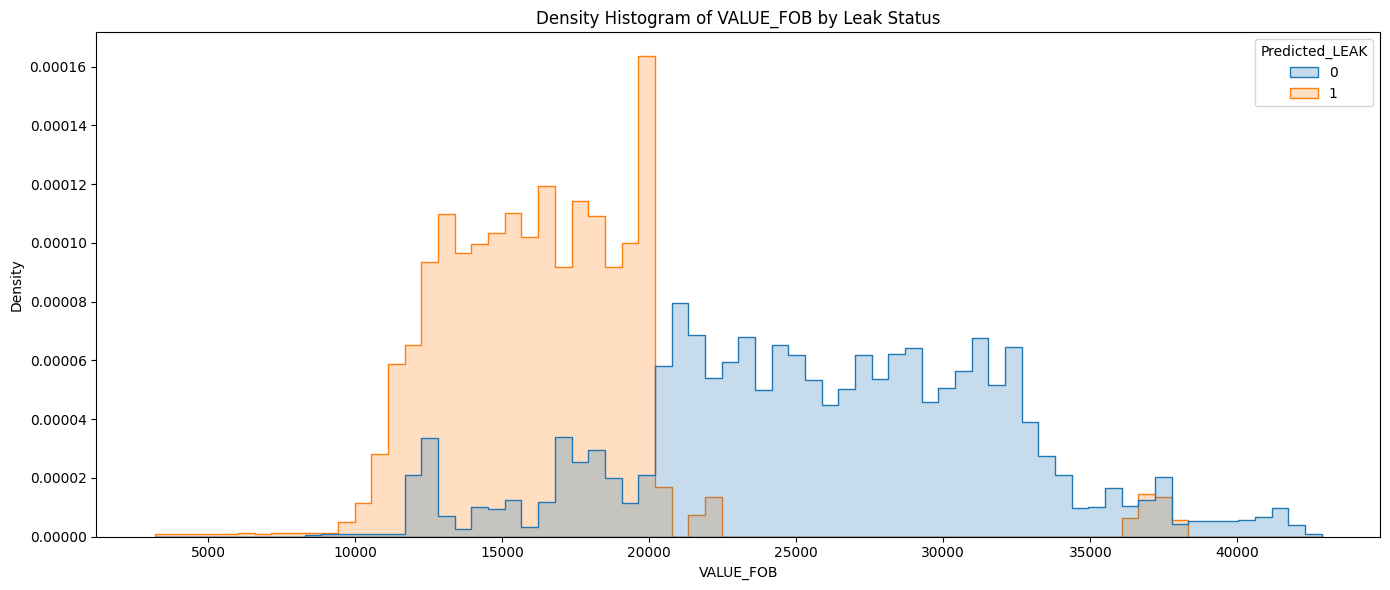

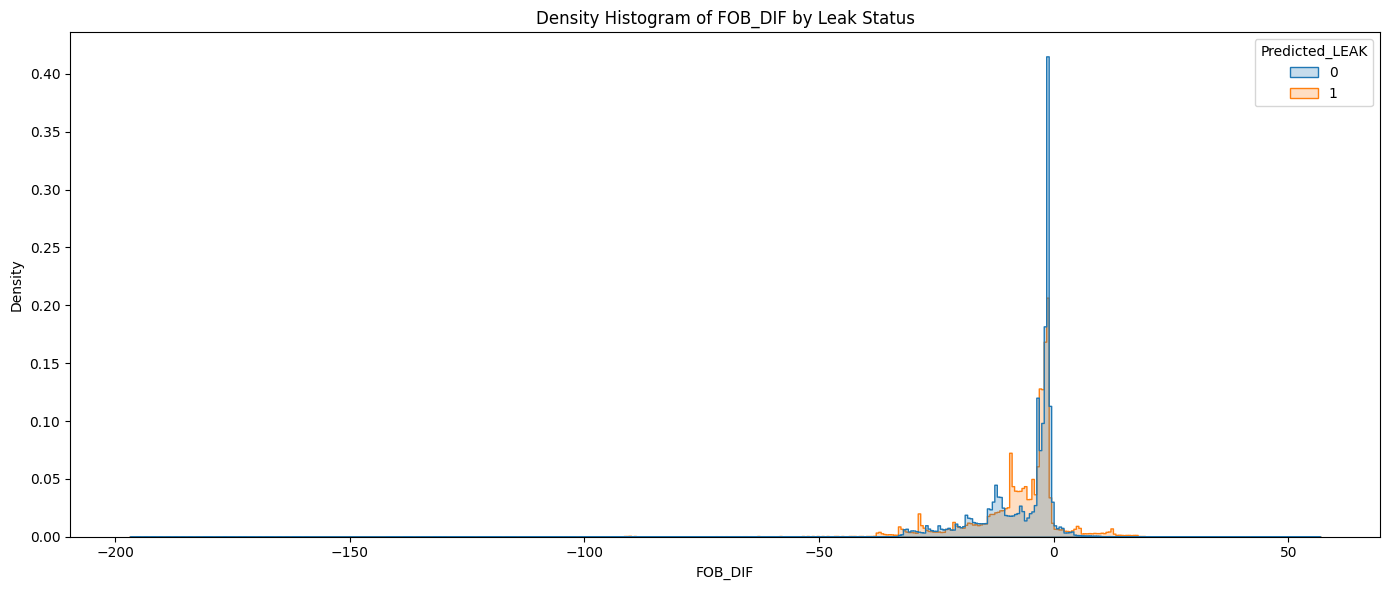

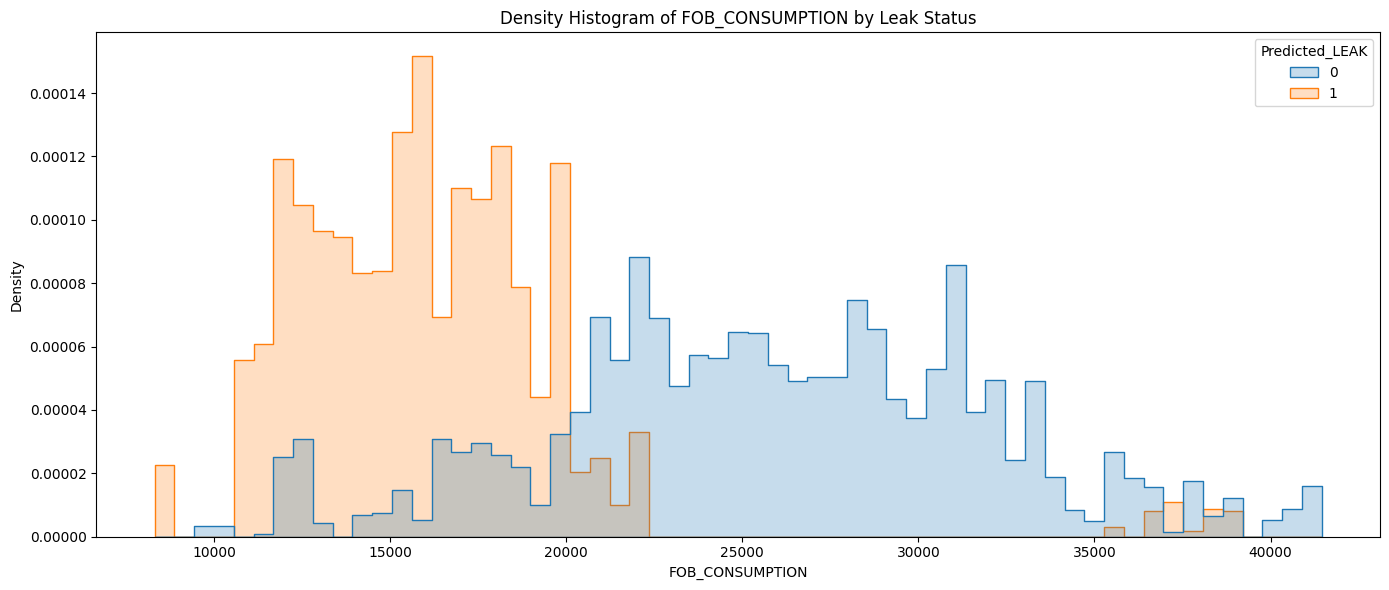

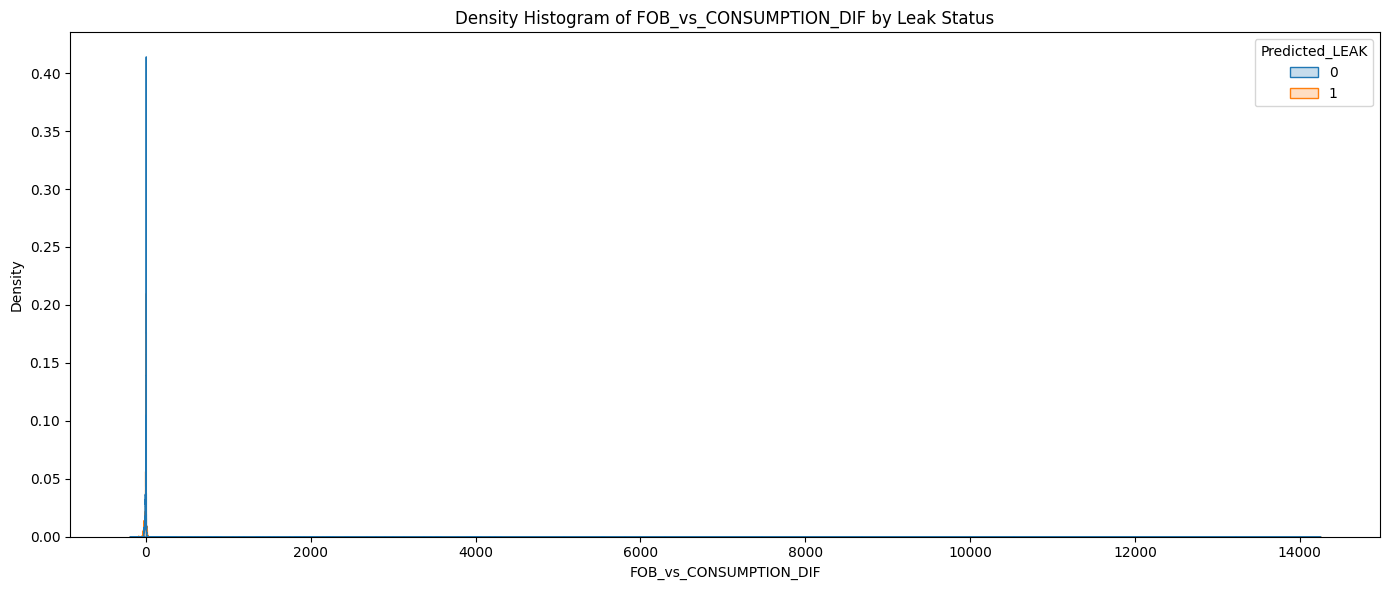

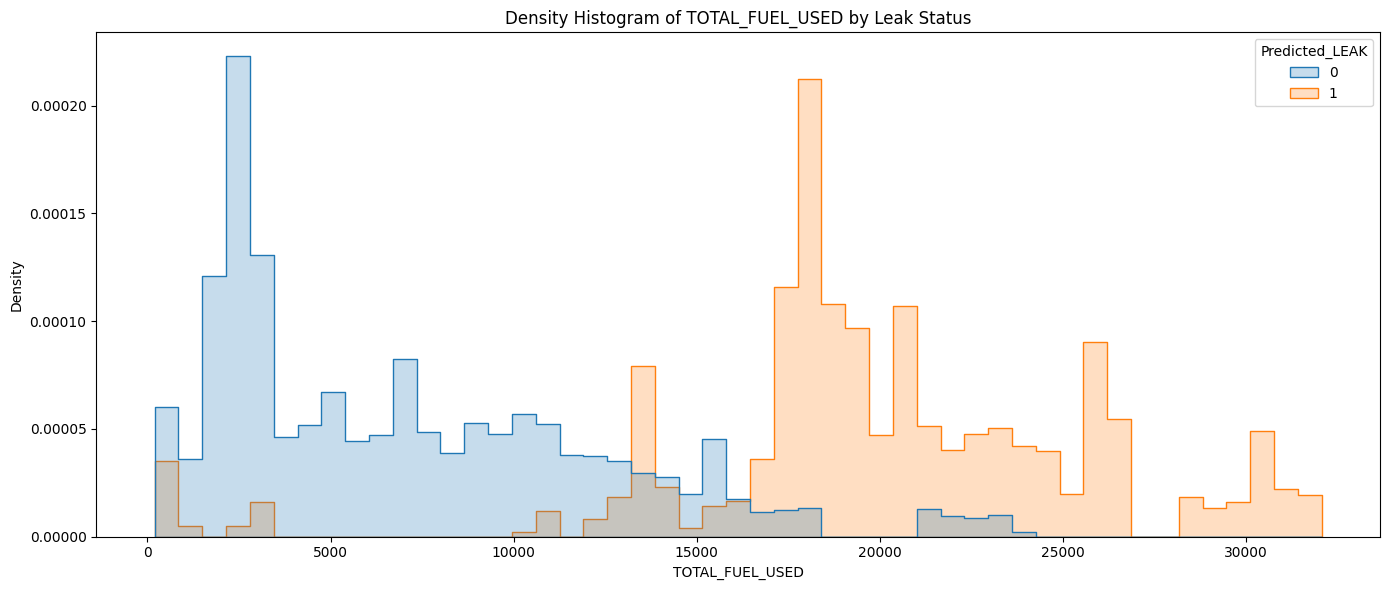

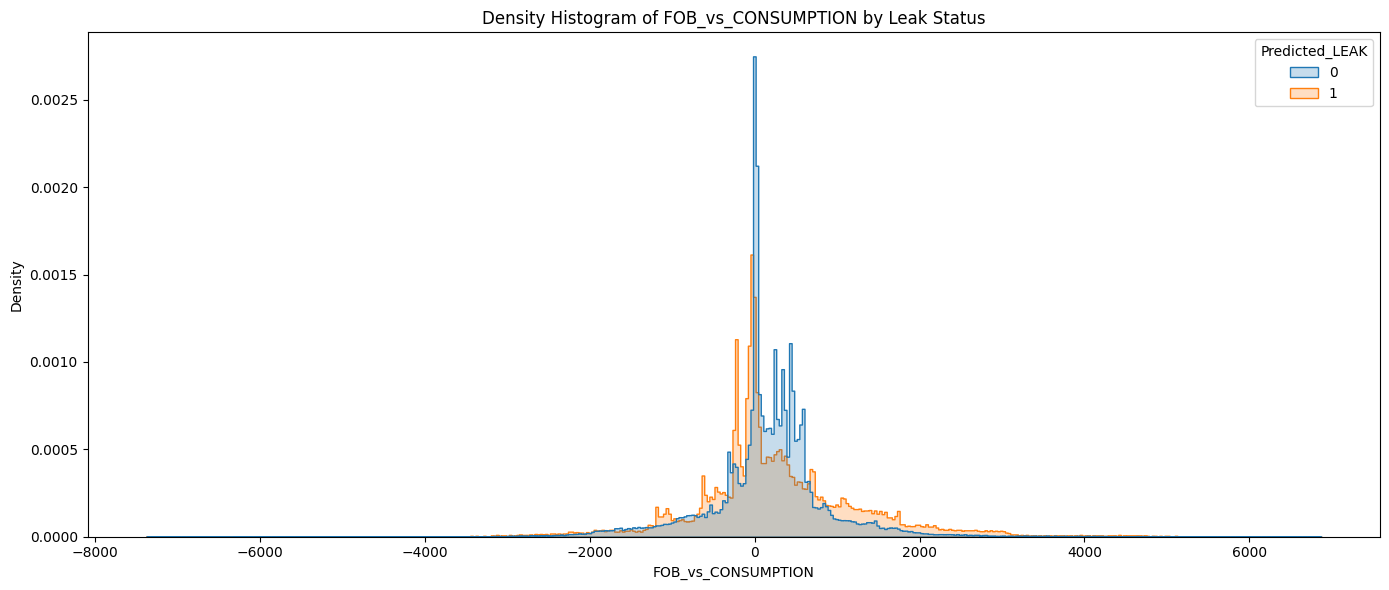

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_analyse = ['VALUE_FOB', 'FOB_DIF', 'FOB_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'TOTAL_FUEL_USED', 'FOB_vs_CONSUMPTION']

# Iterate over the columns in df_final
for column in columns_analyse:
    # Create a figure for the subplot
    fig, axs = plt.subplots(figsize=(14, 6))

    # Histogram for the column
    sns.histplot(data=df_fina_test_37, x=column, hue="Predicted_LEAK", element="step", stat="density", common_norm=False, ax=axs)
    axs.set_title(f'Density Histogram of {column} by Leak Status')

    plt.tight_layout()
    plt.show()

In [45]:
df_fina_test_37['Predicted_LEAK'].value_counts()/len(df_fina_test_37)

Predicted_LEAK
0    0.781541
1    0.218459
Name: count, dtype: float64

## Model Part 2

In [46]:
# Correct the features and target setup
data = data_filtered

# i need to drop more columns for X
X = data.drop(['LEAK','Unnamed: 0','Unnamed: 0.1','UTC_TIME','TOTAL_FUEL_USED', 'FUSED_dif', 'FOB_CONSUMPTION','FOB_vs_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF'], axis=1)
y = data['LEAK'] 

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Convert the scaled data back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [48]:
# Define the model with chosen hyperparameters
model_LR = LogisticRegression(C=1, random_state=42, class_weight='balanced')

# Fit the model to the training data
model_LR.fit(X_train_scaled, y_train)

# Predictions on the training and test sets
y_train_pred = model_LR.predict(X_train_scaled)
y_test_pred = model_LR.predict(X_test_scaled)

# Evaluation on the training set
print("Training Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

# Evaluation on the test set
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred)}")

Training Set Evaluation:
Accuracy: 0.7883952882391404
Recall: 0.7558080090883271
Precision: 0.43356848433503314
F1 Score: 0.5510358322376254

Test Set Evaluation:
Accuracy: 0.789046336417223
Recall: 0.7534061479563112
Precision: 0.4370631654582272
F1 Score: 0.5532038032244728


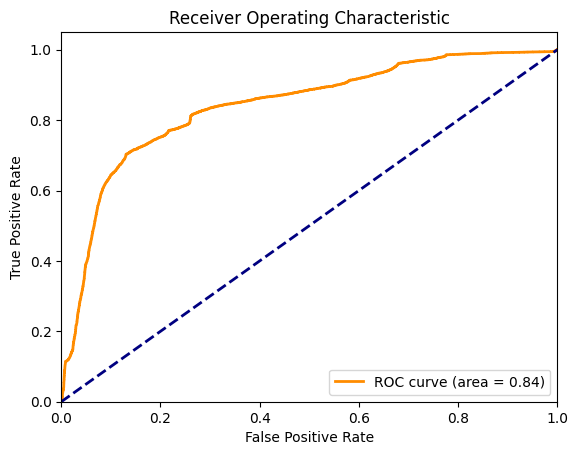

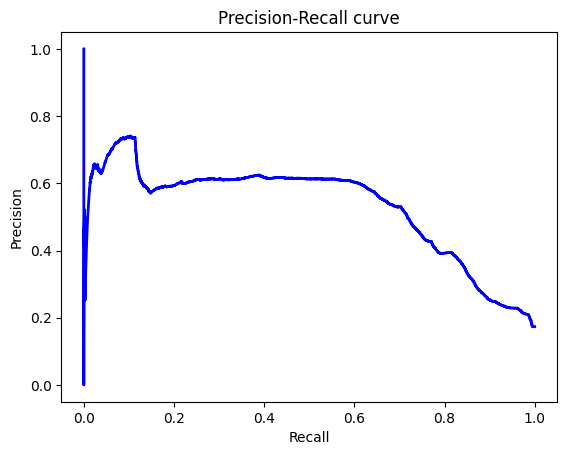

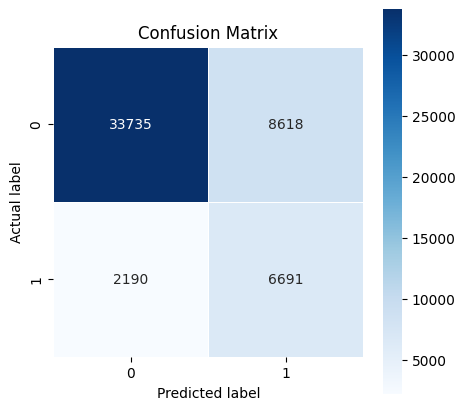

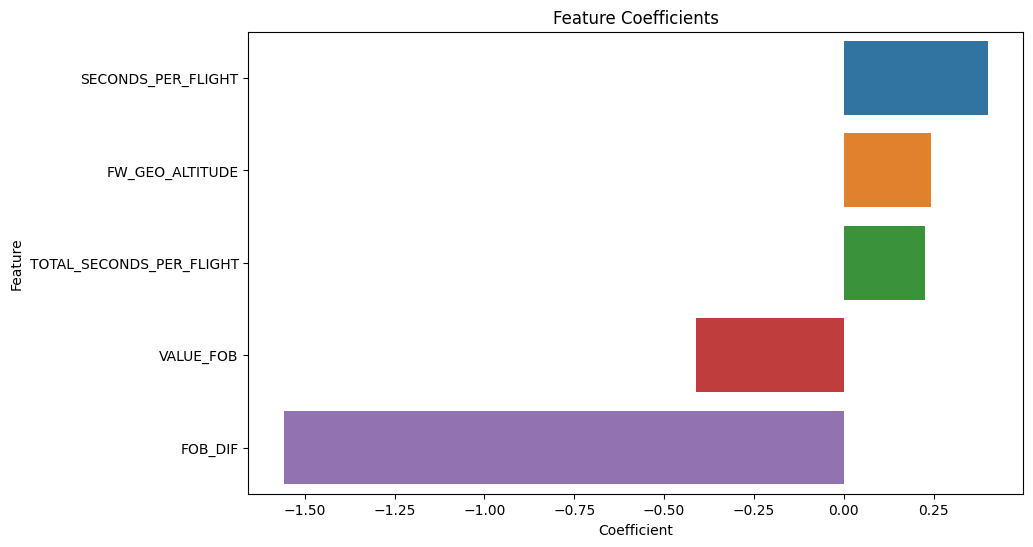

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model_LR.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Coefficient Plot
coefficients = model_LR.coef_.flatten()
features = X_train_scaled.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients')
plt.show()

In [50]:
# Correct the features and target setup
data_LGBM = data_filtered

# i need to drop more columns for X
X_LGBM = data.drop(['LEAK','Unnamed: 0','FOB_DIF','Unnamed: 0.1','TOTAL_FUEL_USED','FUSED_dif','UTC_TIME'], axis=1)
y_LGBM = data['LEAK'] 

numerical_features =X_LGBM.select_dtypes(include=['int64', 'float64']).columns

In [51]:
# Split the data into training and test sets
X_train_LGBM, X_test_LGBM, y_train_LGBM, y_test_LGBM = train_test_split(X_LGBM, y_LGBM, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_LGBM = scaler.fit_transform(X_train_LGBM[numerical_features])
X_test_scaled_LGBM = scaler.transform(X_test_LGBM[numerical_features])

# Convert the scaled data back to a DataFrame
X_train_scaled_LGBM = pd.DataFrame(X_train_scaled_LGBM, columns=numerical_features, index=X_train.index)
X_test_scaled_LGBM = pd.DataFrame(X_test_scaled_LGBM, columns=numerical_features, index=X_test.index)

In [52]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define the pipeline with a single step containing the LightGBM model
# Note: LightGBM handles feature scaling internally, so we don't need a scaler here
pipe = Pipeline(steps=[('model', LGBMClassifier(random_state=0))])

# Define the parameter grid to search over
# Adjust these parameters as necessary for your dataset and goals
param_grid_LGBM = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [5],
    "model__learning_rate": [0.01, 0.1],
    "model__num_leaves": [10],
    "model__min_child_samples": [20, 40],
}


# Define grid search
grid_search_LGBM = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_LGBM,
    scoring='f1',
)

# Fit grid search to the training data
grid_search_LGBM.fit(X_train_scaled_LGBM, y_train_LGBM)

# Get the best parameters and score
best_parameters_LGBM = grid_search_LGBM.best_params_
best_score_LGBM = grid_search_LGBM.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_parameters_LGBM)
print("Best Score:", best_score_LGBM)

# Predict on the training data using the best found parameters
y_train_pred_LGBM = grid_search_LGBM.best_estimator_.predict(X_train_scaled_LGBM)

# Calculate and print the metrics for the training set
train_accuracy_LGBM = accuracy_score(y_train_LGBM, y_train_pred_LGBM)
train_recall_LGBM = recall_score(y_train_LGBM, y_train_pred_LGBM, average='binary')
train_f1_LGBM = f1_score(y_train_LGBM, y_train_pred_LGBM, average='binary')
print(f"Training Set Accuracy: {train_accuracy_LGBM}")
print(f"Training Set Recall: {train_recall_LGBM}")
print(f"Training Set F1 Score: {train_f1_LGBM}")

# Predict on the test data using the best found parameters
y_test_pred_LGBM = grid_search_LGBM.best_estimator_.predict(X_test_scaled_LGBM)

# Calculate and print the metrics for the test set
test_accuracy_LGBM = accuracy_score(y_test_LGBM, y_test_pred_LGBM)
test_recall_LGBM = recall_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
test_f1_LGBM = f1_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
test_presicion_LGBM = precision_score(y_test_LGBM, y_test_pred_LGBM, average='binary')
print(f"Test Set Accuracy: {test_accuracy_LGBM}")
print(f"Test Set Recall: {test_recall_LGBM}")
print(f"Test Set Presicion: {test_presicion_LGBM}")
print(f"Test Set F1 Score: {test_f1_LGBM}")

[LightGBM] [Info] Number of positive: 28168, number of negative: 135779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 163947, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171812 -> initscore=-1.572842
[LightGBM] [Info] Start training from score -1.572842
[LightGBM] [Info] Number of positive: 28168, number of negative: 135779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 163947, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171812 -> initscore=-1.572842
[LightGBM] [Info] Start training from score -1.572842
[LightGBM]

In [53]:
print("Best Parameters:", best_parameters_LGBM)

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_samples': 40, 'model__n_estimators': 100, 'model__num_leaves': 10}


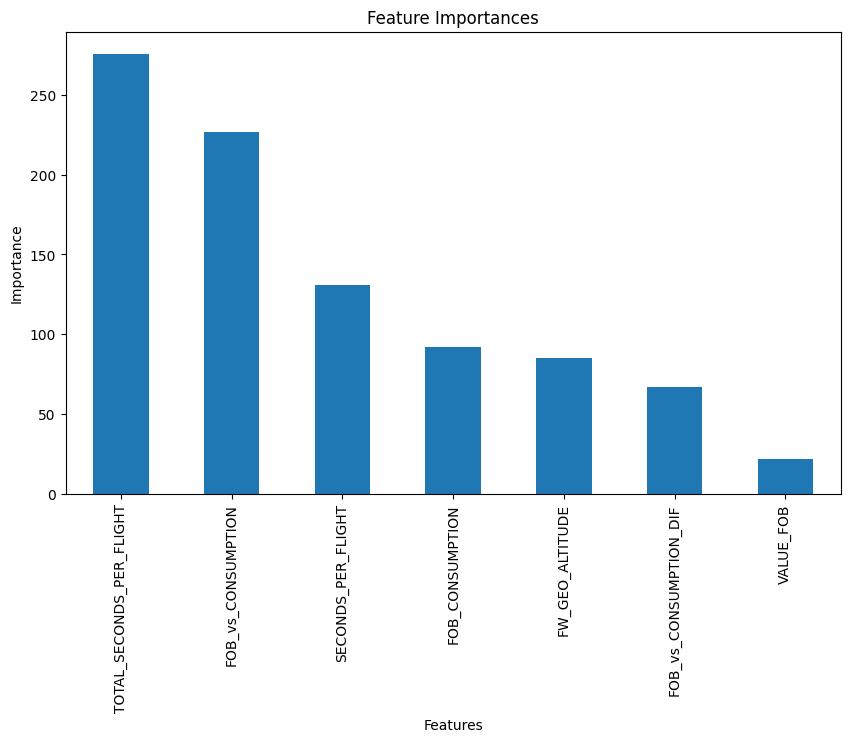

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the best LightGBM model from the grid search
best_lgbm_model = grid_search_LGBM.best_estimator_.named_steps['model']

# Get feature importances
feature_importances = best_lgbm_model.feature_importances_

# Create a pandas series to easily sort the feature importances
importance_series = pd.Series(feature_importances, index=numerical_features)

# Sort the features by their importance
sorted_importances = importance_series.sort_values(ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

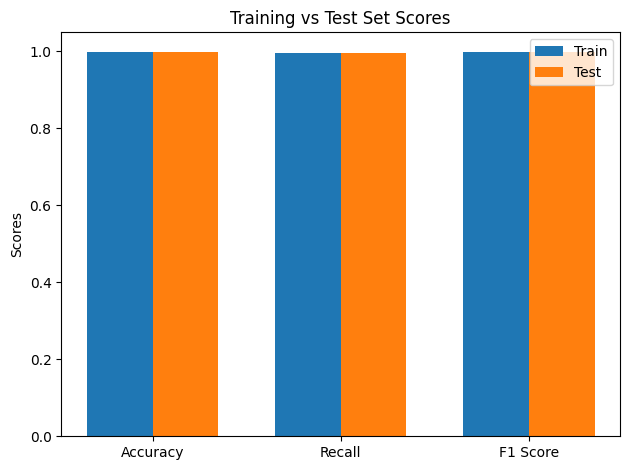

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['Accuracy', 'Recall', 'F1 Score']
train_scores = [train_accuracy_LGBM, train_recall_LGBM, train_f1_LGBM]
test_scores = [test_accuracy_LGBM, test_recall_LGBM, test_f1_LGBM]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs Test Set Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()


In [56]:
# Get the predicted probabilities for the positive class
y_probs = grid_search_LGBM.best_estimator_.predict_proba(X_test_scaled_LGBM)[:, 1]

In [57]:
from sklearn.metrics import recall_score, accuracy_score

thresholds = np.linspace(0, 1, 100)
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    # Apply threshold to positive class probabilities to create binary predictions
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate recall and accuracy
    recall = recall_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)


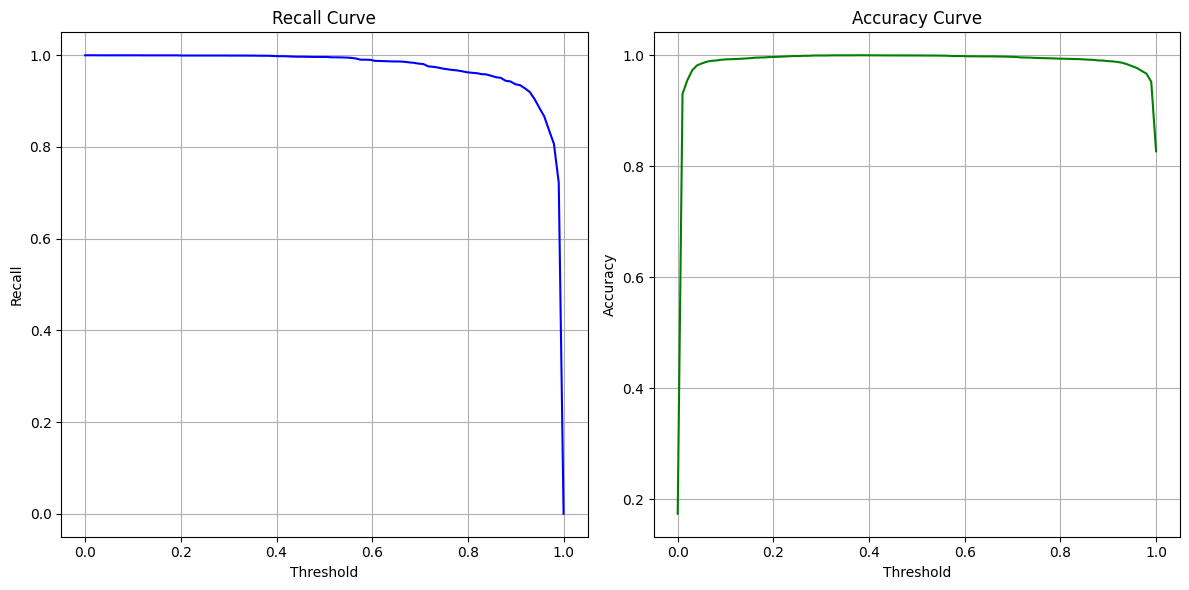

In [58]:
plt.figure(figsize=(12, 6))

# Recall curve
plt.subplot(1, 2, 1)
plt.plot(thresholds, recall_scores, label='Recall', color='blue')
plt.title('Recall Curve')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.grid(True)

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(thresholds, accuracy_scores, label='Accuracy', color='green')
plt.title('Accuracy Curve')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [59]:
df_fina_test_37.rename(columns={'FOB': 'VALUE_FOB'}, inplace=True)

In [60]:
# Drop the unnecessary columns in df_fina_test_37
X_final_test = df_fina_test_37.drop(['Unnamed: 0', 'FOB_DIF', 'UTC_TIME'], axis=1)

# Scale the features of df_fina_test_37
X_final_test_scaled = scaler.transform(X_final_test[numerical_features])

# Convert the scaled data back to a DataFrame
X_final_test_scaled = pd.DataFrame(X_final_test_scaled, columns=numerical_features, index=X_final_test.index)

# Use the best estimator to make predictions on the final test set
y_final_test_pred = grid_search_LGBM.best_estimator_.predict(X_final_test_scaled)

# If you want to view or use the predictions
print(y_final_test_pred)


[0 0 0 ... 0 0 0]


In [61]:
# Assuming y_final_test_pred contains the predictions for df_fina_test_37
df_fina_test_37['Predicted_LEAK'] = y_final_test_pred
df_fina_test_37

,Unnamed: 0,UTC_TIME,FW_GEO_ALTITUDE,Flight,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,FUSED_dif,FOB_CONSUMPTION,VALUE_FOB,FOB_DIF,FOB_vs_CONSUMPTION,FOB_vs_CONSUMPTION_DIF,Predicted_LEAK
0,441,2016-08-23 12:30:37,29977.0,11.0,2685.797119,1573.0,10387.0,0.000000,17070.000000,17069.207858,NaN,-0.792142,NaN,0
1,442,2016-08-23 12:30:38,29983.0,11.0,2687.107483,1574.0,10387.0,1.310364,17068.689636,17068.225707,-0.982150,-0.463929,0.328213,0
2,443,2016-08-23 12:30:39,29977.0,11.0,2688.342224,1575.0,10387.0,1.234741,17067.454895,17067.236401,-0.989306,-0.218494,0.245435,0
3,444,2016-08-23 12:30:40,29976.0,11.0,2689.734802,1576.0,10387.0,1.392578,17066.062317,17066.241182,-0.995219,0.178865,0.397359,0
4,445,2016-08-23 12:30:41,29985.0,11.0,2690.970642,1577.0,10387.0,1.235840,17064.826477,17065.241215,-0.999967,0.414738,0.235873,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55740,91539,2018-03-31 08:54:16,3082.0,494.0,4988.280762,3470.0,6373.0,0.875977,12703.960327,12620.272156,-0.087298,-83.688172,0.788678,0
55741,91540,2018-03-31 08:54:17,3084.0,494.0,4989.239624,3471.0,6373.0,0.958862,12703.001465,12620.195560,-0.076595,-82.805905,0.882267,0
55742,91541,2018-03-31 08:54:18,3085.0,494.0,4990.272095,3472.0,6373.0,1.032471,12701.968994,12620.129627,-0.065933,-81.839367,0.966537,0
55743,91542,2018-03-31 08:54:19,3086.0,494.0,4991.234497,3473.0,6373.0,0.962402,12701.006592,12620.074311,-0.055315,-80.932281,0.907087,0


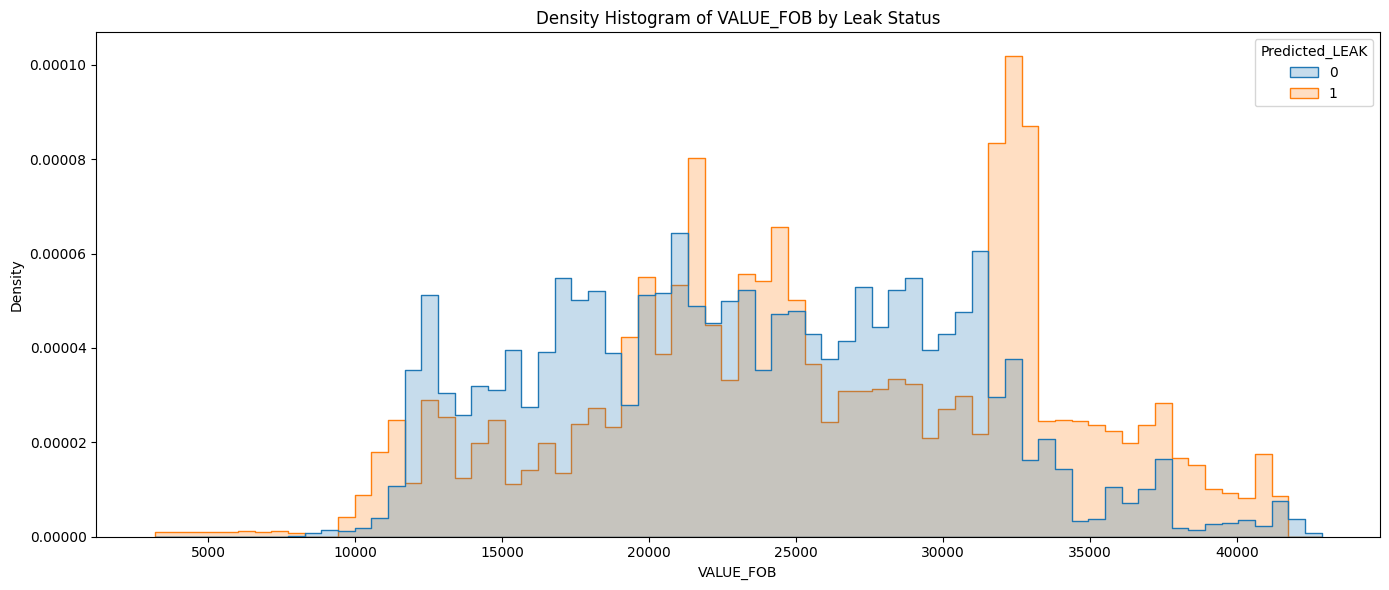

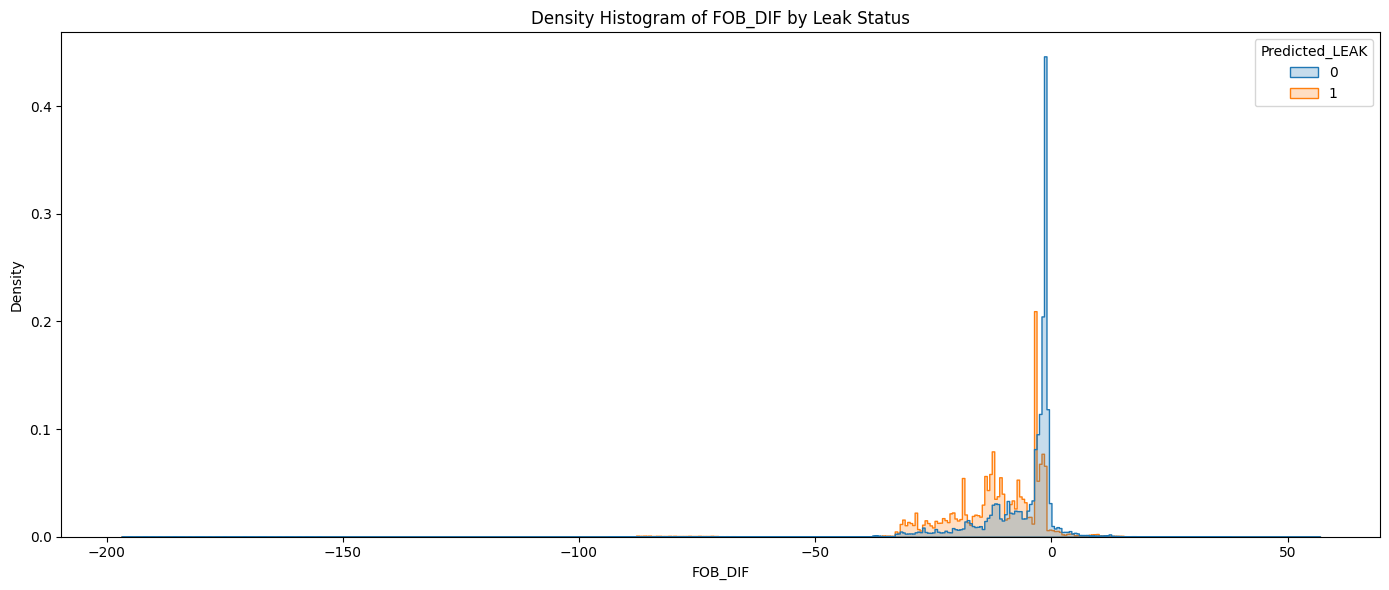

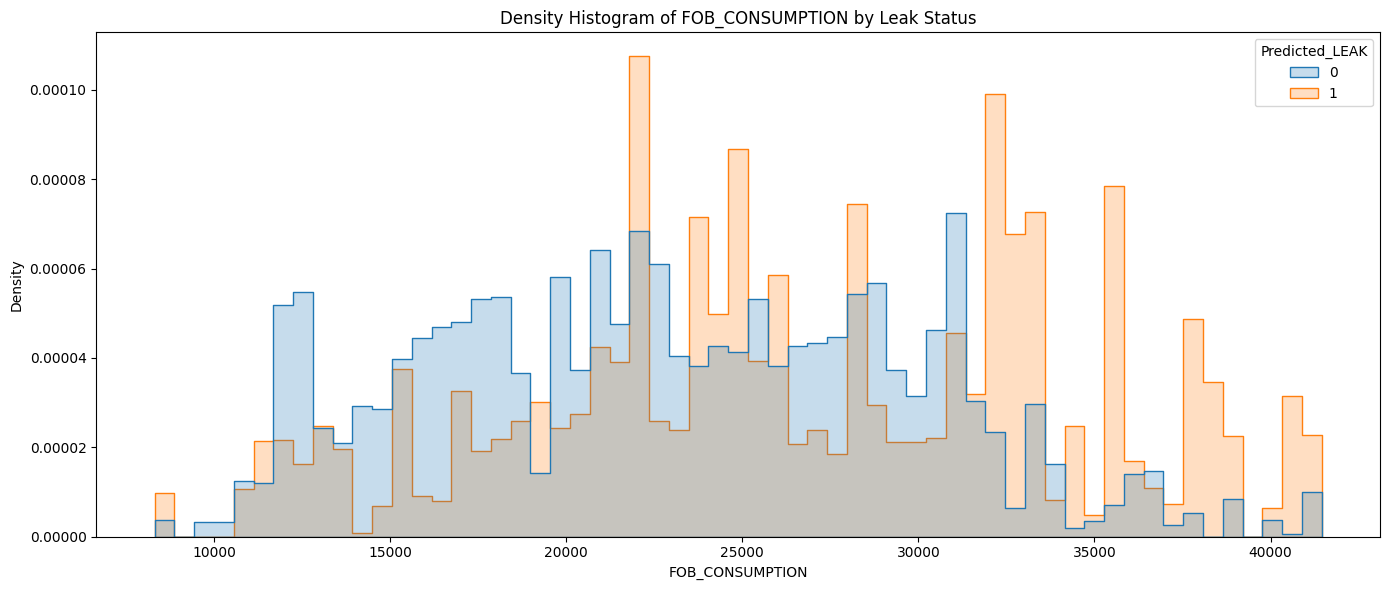

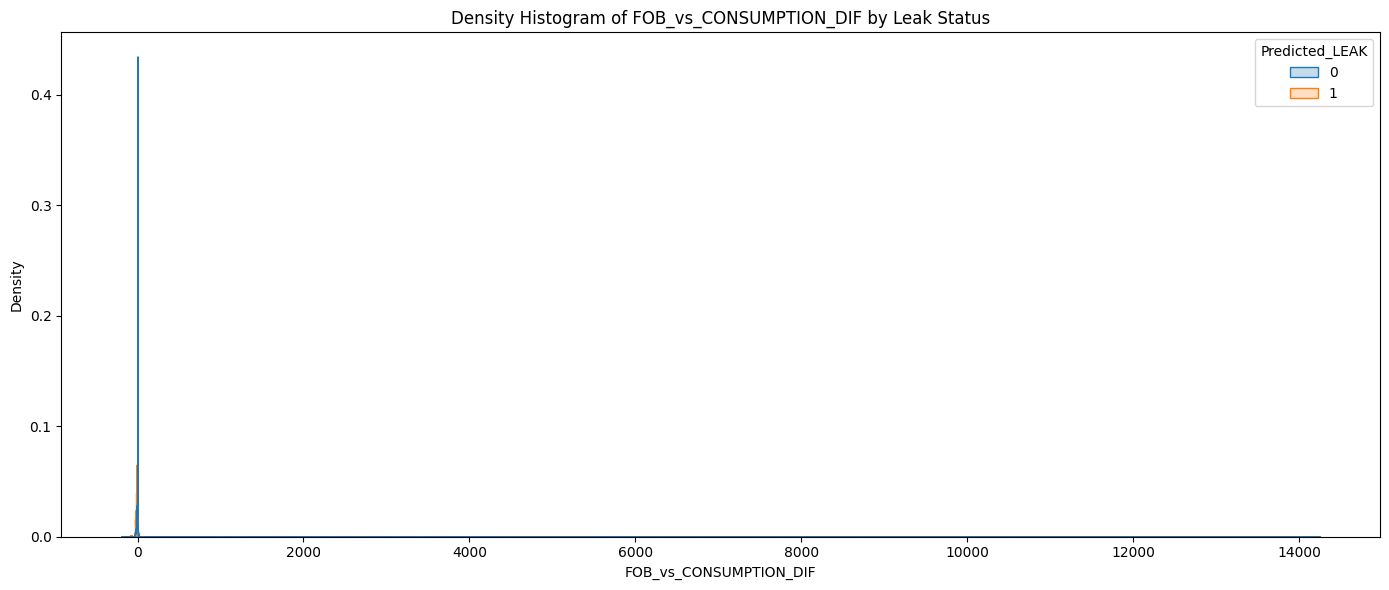

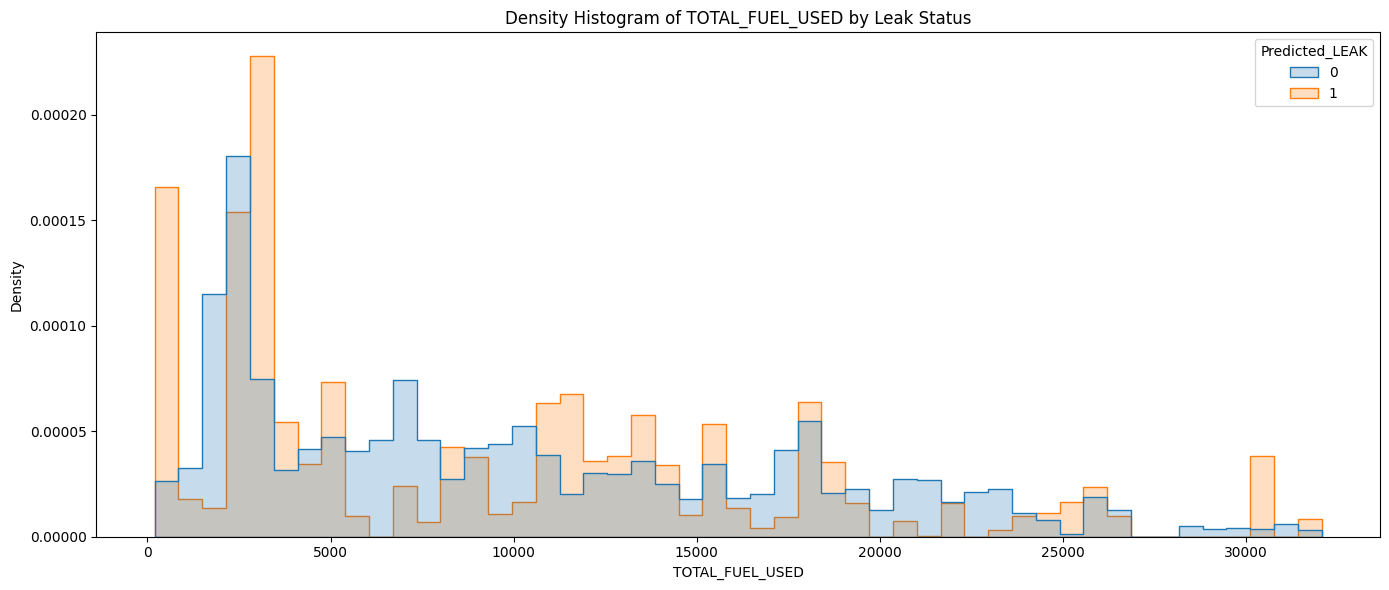

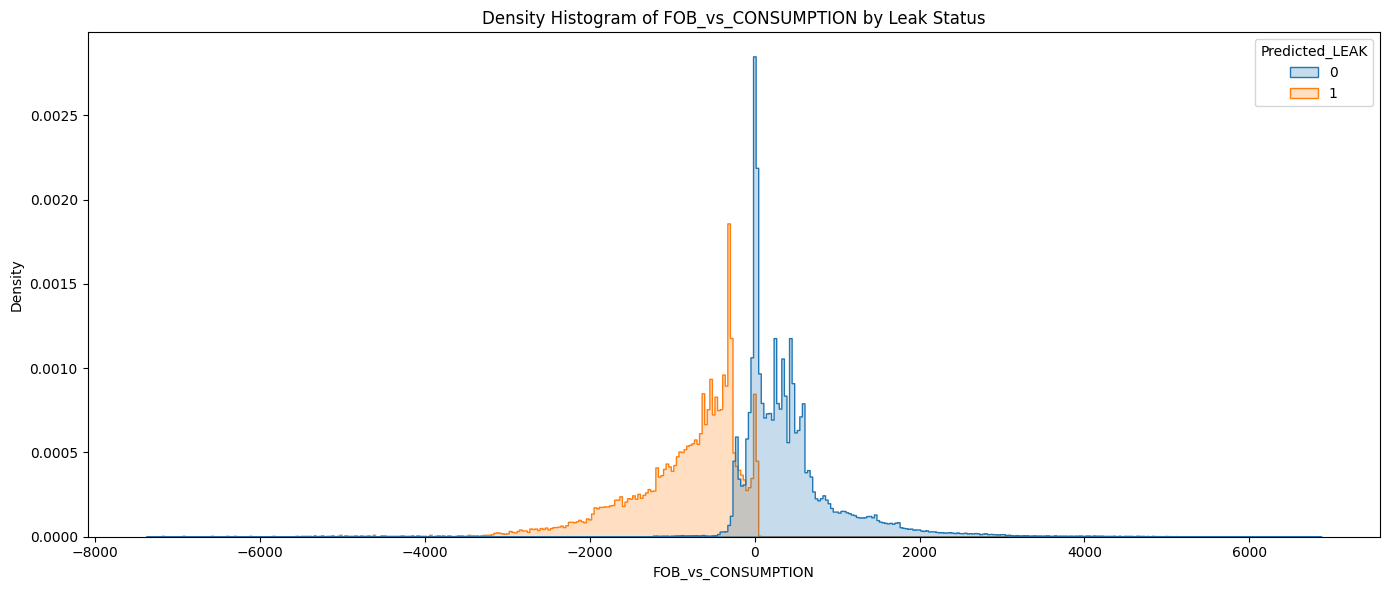

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_analyse = ['VALUE_FOB', 'FOB_DIF', 'FOB_CONSUMPTION', 'FOB_vs_CONSUMPTION_DIF', 'TOTAL_FUEL_USED', 'FOB_vs_CONSUMPTION']

# Iterate over the columns in df_final
for column in columns_analyse:
    # Create a figure for the subplot
    fig, axs = plt.subplots(figsize=(14, 6))

    # Histogram for the column
    sns.histplot(data=df_fina_test_37, x=column, hue="Predicted_LEAK", element="step", stat="density", common_norm=False, ax=axs)
    axs.set_title(f'Density Histogram of {column} by Leak Status')

    plt.tight_layout()
    plt.show()

In [63]:
df_fina_test_37['Predicted_LEAK'].value_counts()/len(df_fina_test_37)

Predicted_LEAK
0    0.798565
1    0.201435
Name: count, dtype: float64

In [64]:
# Create a dataset for leak 1
data_leak_1 = df_fina_test_37[df_fina_test_37['Predicted_LEAK'] == 1]

# Create a dataset for leak 0
data_leak_0 = df_fina_test_37[df_fina_test_37['Predicted_LEAK'] == 0]

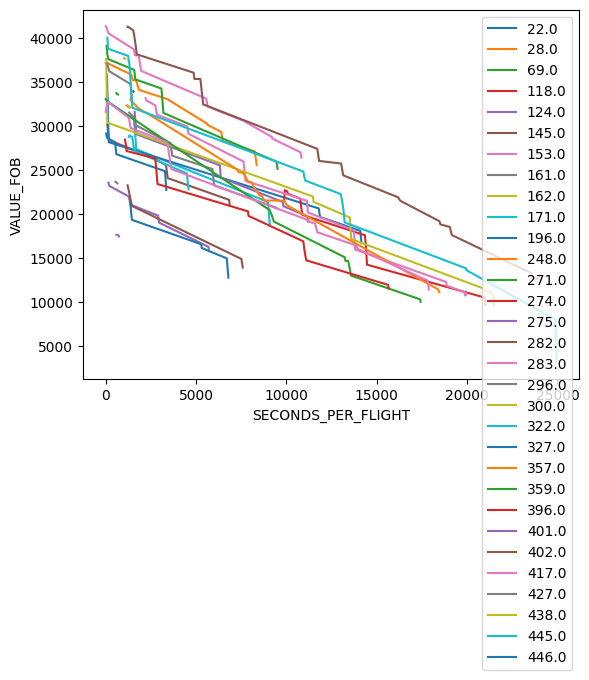

In [65]:
# Get unique flights
flights = data_leak_1['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter data for the current flight
    flight_data = data_leak_1[data_leak_1['Flight'] == flight]
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
# Set labels and legend
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.legend()

# Show the plot
plt.show()

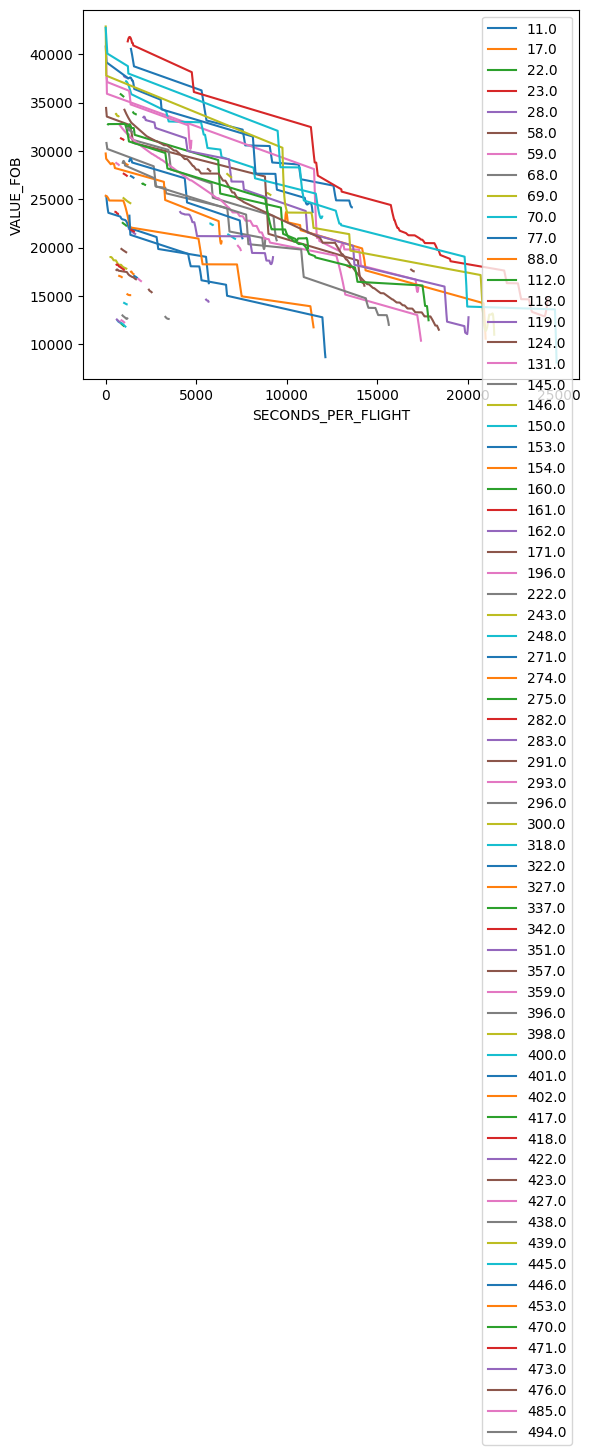

In [66]:
# Get unique flights
flights = data_leak_0['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter data for the current flight
    flight_data = data_leak_0[data_leak_0['Flight'] == flight]
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
# Set labels and legend
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.legend()

# Show the plot
plt.show()